In [1]:
from CovMat import *
import gc
from cl_and_cov import *
from signal_to_noise import *
from fisher_FoM import *

In [2]:
import numpy as np
Omega_m=0.315
Omega_b=0.045
h=0.67
sigma8=0.8
n_s=0.96
w_0 = -1
w_a = 0
transfer_function = 'bbks'
fsky = 0.4
ell = np.arange(2, 10001)

In [3]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(
    Omega_c = Omega_m-Omega_b, Omega_b=Omega_b, h=h, sigma8=sigma8, n_s=n_s,
    transfer_function=transfer_function)

In [4]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
numdenPerStr = arcmin_per_str*10.024

In [5]:
#binning in l
binl=10**np.linspace(np.log10(50), np.log10(8500), 20)

In [6]:
#try a symmetric distribution
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
dndz_s = np.zeros([400,2])
dndz_s[:, 0] = np.linspace(0.001, 4.001, 400)
dndz_s[:, 1] = dndz_s[:, 1] = gaussian(dndz_s[:, 0], 2.001, 0.5)

In [8]:
cl_s = {} 
cov_s = {}
redshifts_s = {}
sliced_dndz_s = {}

for n in range(1,5):
    for btype in ["z", "n"]:
        cov_s["{0}_{1}".format(btype, n)], cl_s["{0}_{1}".format(btype, n)], redshifts_s["{0}_{1}".format(btype, n)], sliced_dndz_s["{0}_{1}".format(btype, n)] = getDataArray(n_bins=n, bin_type=btype, cosmo=cosmo, dndz=dndz_s, ell=ell, numdenPerStr = numdenPerStr, fsky=0.4)

In [9]:
stn_s = {}
for i in ["z", "n"]:
    for j in range(1,5):
        stn_s["{0}_{1}".format(i,j)] = SignalToNoise(bins_in_z=j, binl=binl, cl = cl_s["{0}_{1}".format(i, j)], cov = cov_s["{0}_{1}".format(i, j)], ell=ell)

In [11]:
fisher_s = {}
for i in ["z", "n"]:
    for j in range(1,5):
        fisher_s["{0}_{1}".format(i,j)] = fisher_matrix(covariance = cov_s["{0}_{1}".format(i, j)], dndz_sliced = sliced_dndz_s["{0}_{1}".format(i, j)])

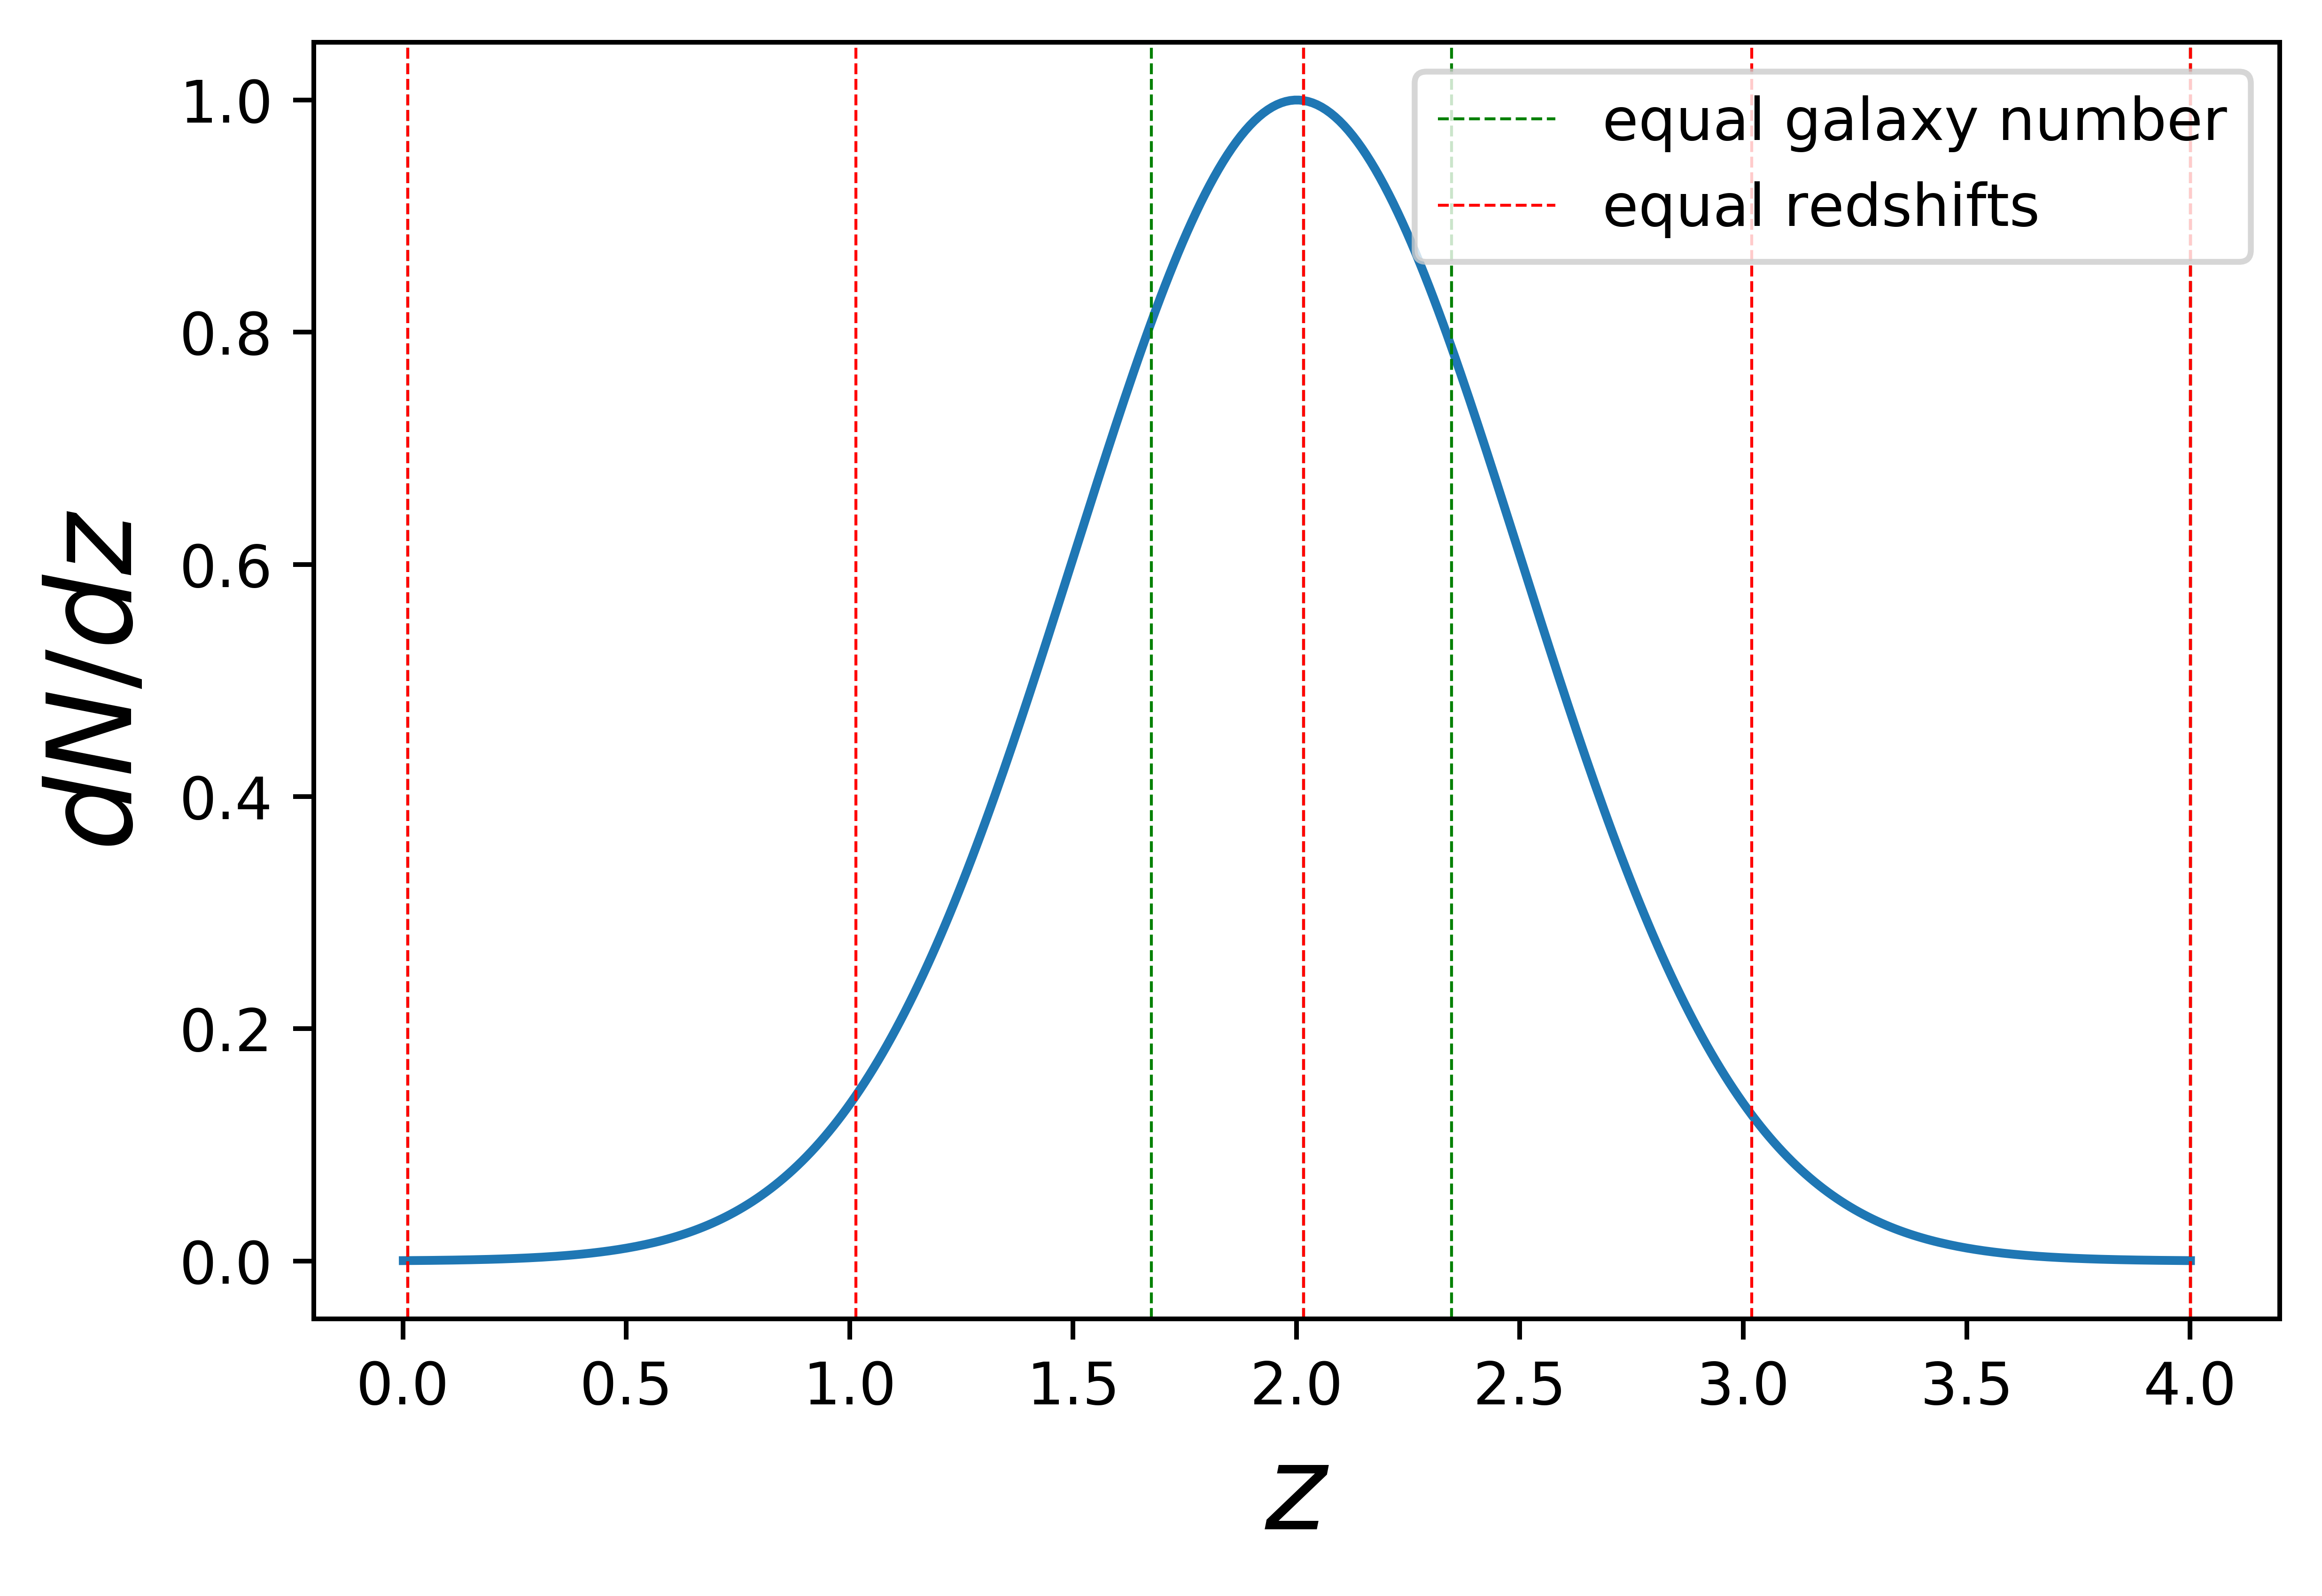

In [13]:
plt.plot(dndz_s[:,0], dndz_s[:,1])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$dN/dz$',fontsize=20)
for x in redshifts_s["n_4"]:
    plt.axvline(x, linewidth=0.5, color="g", linestyle="--")
plt.axvline(x, linewidth=0.5, color="g", linestyle="--", label="equal galaxy number")

for x in redshifts_s["z_4"]:
    plt.axvline(x, linewidth=0.5, color="r", linestyle="--")
plt.axvline(x, linewidth=0.5, color="r", linestyle="--", label="equal redshifts")

plt.legend(loc='upper right')
plt.show()

In [14]:
redshifts_s["n_4"]

[0.011025062656641604,
 1.6751854636591477,
 2.016037593984962,
 2.346864661654135,
 4.001]

In [15]:
redshifts_s["z_4"]

[0.011025062656641604,
 1.0135313283208018,
 2.016037593984962,
 3.0185438596491223,
 4.001]

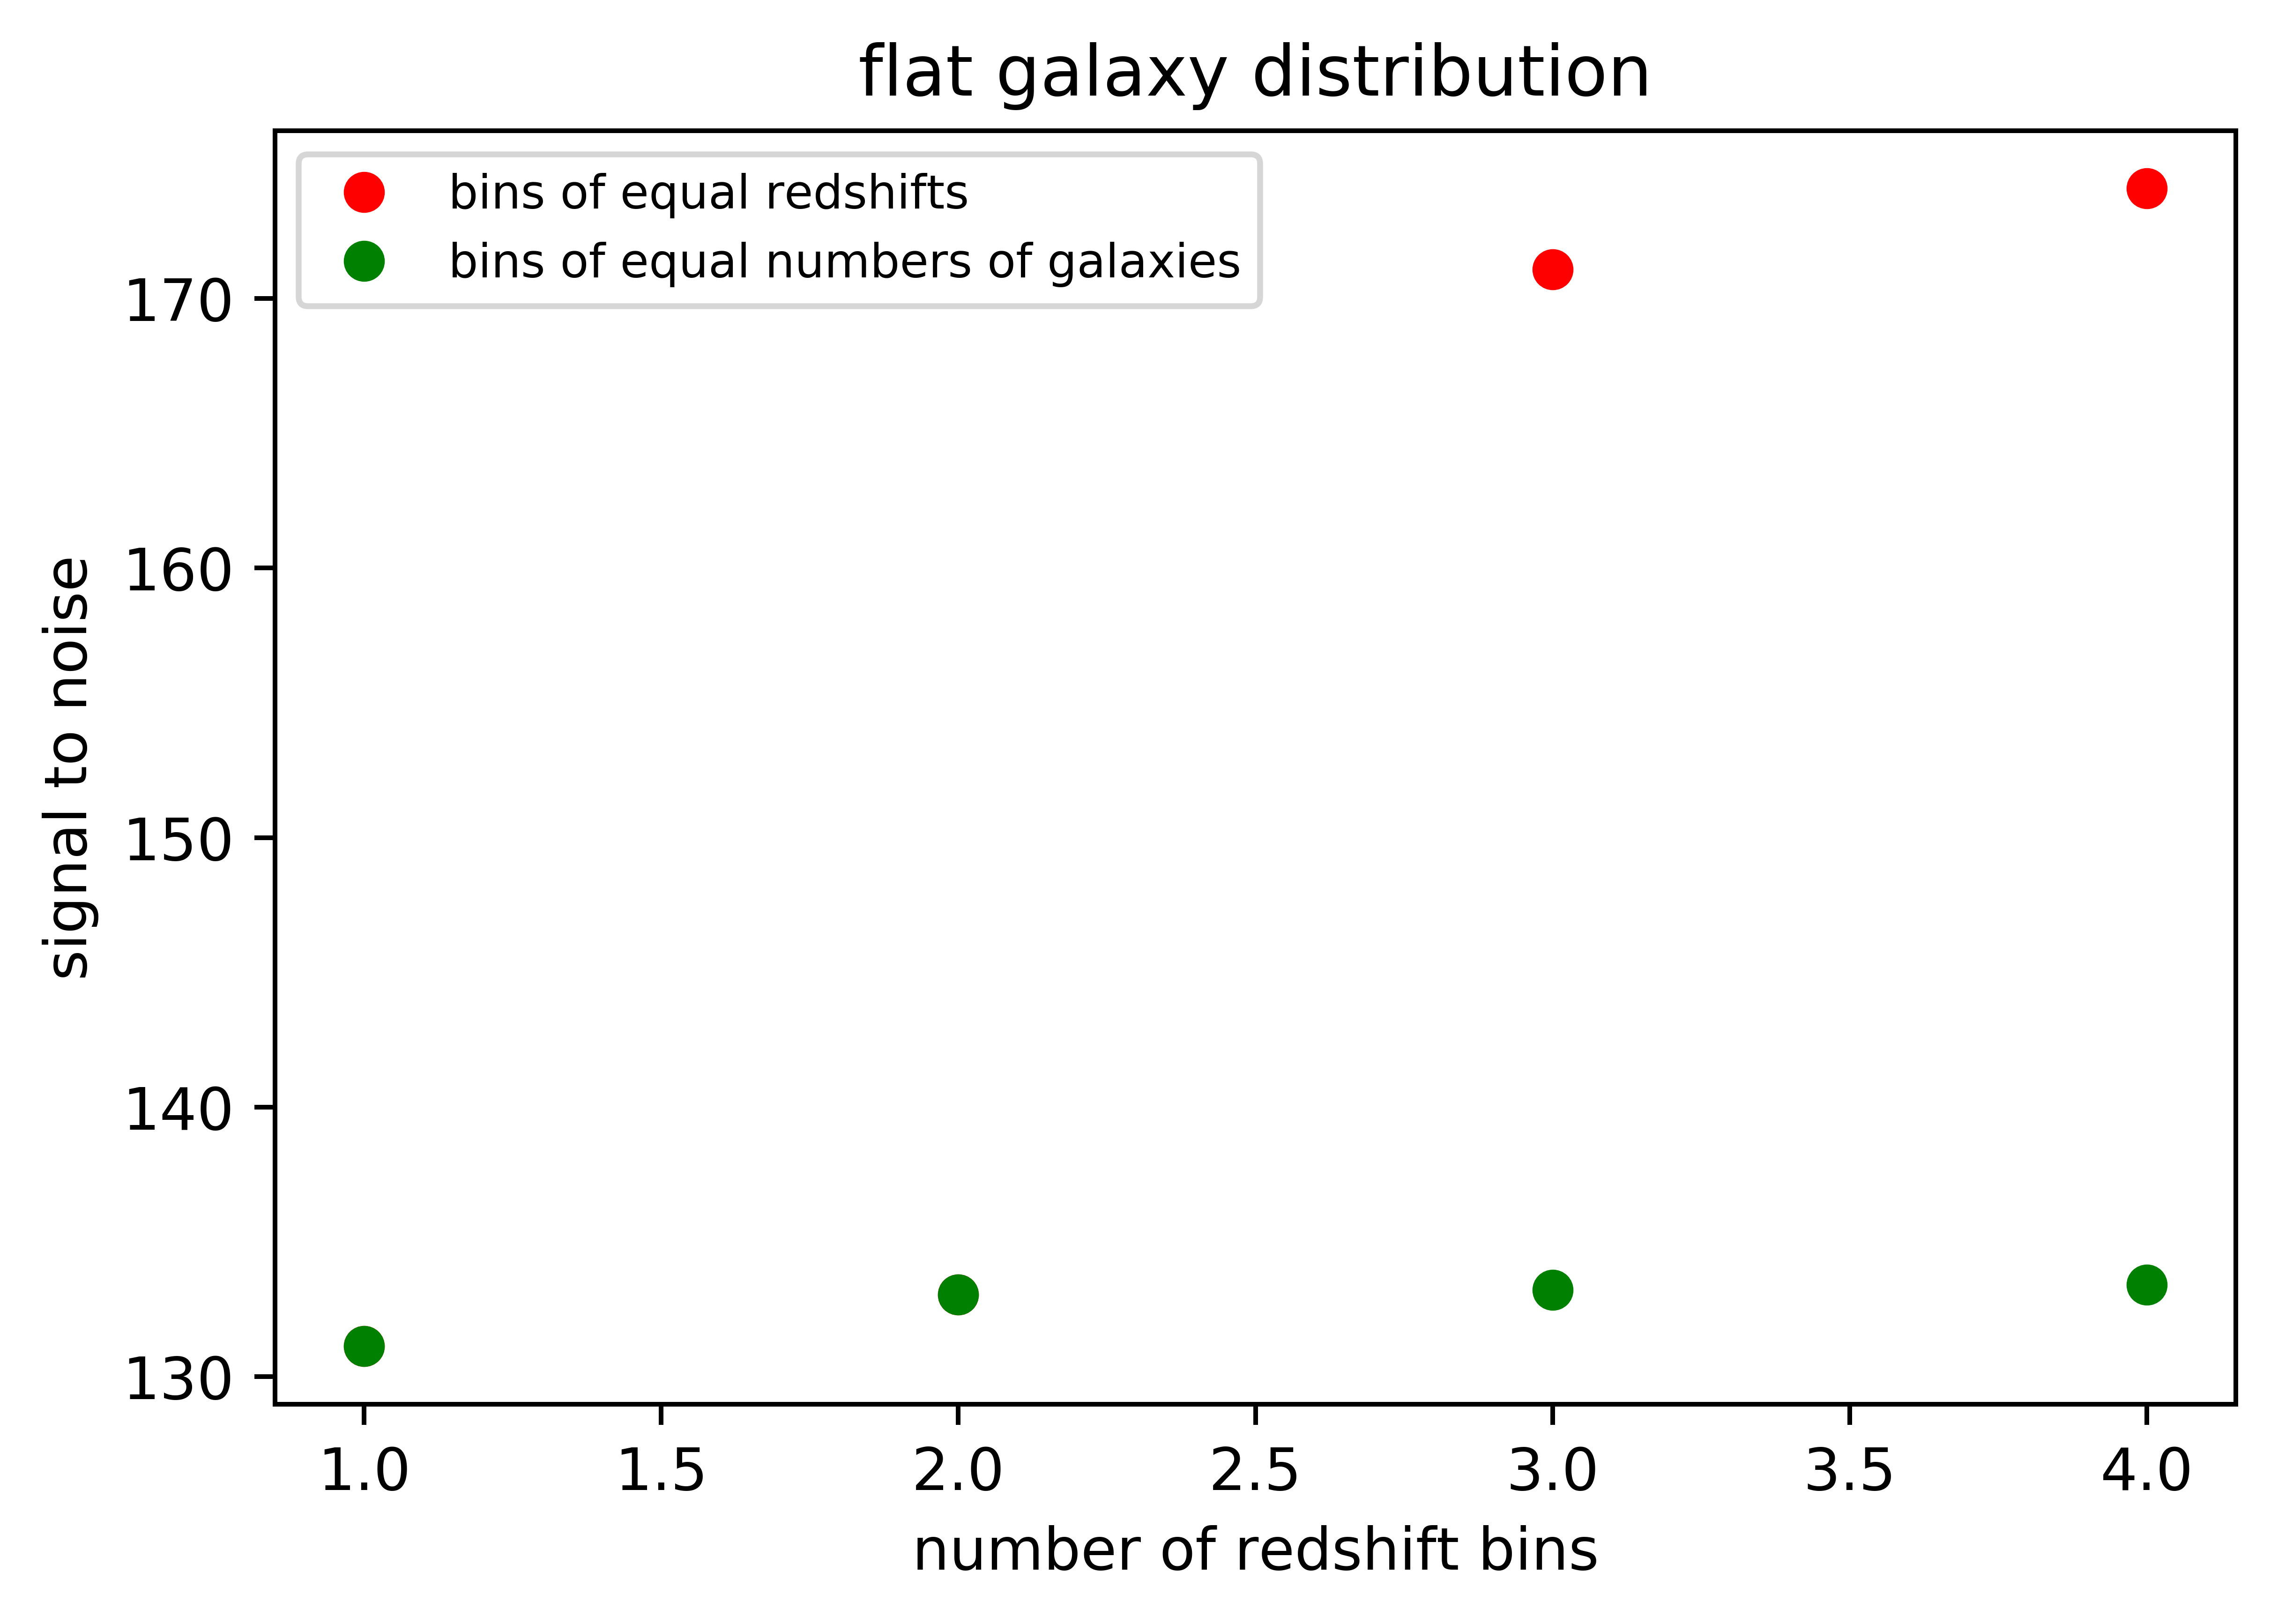

In [26]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [stn_s["z_1"], stn_s["z_2"], stn_s["z_3"], stn_s["z_4"]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [stn_s["n_1"], stn_s["n_2"], stn_s["n_3"], stn_s["n_4"]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("signal to noise")
plt.legend(loc="upper left", fontsize=8)
plt.title('flat galaxy distribution')
plt.show() 

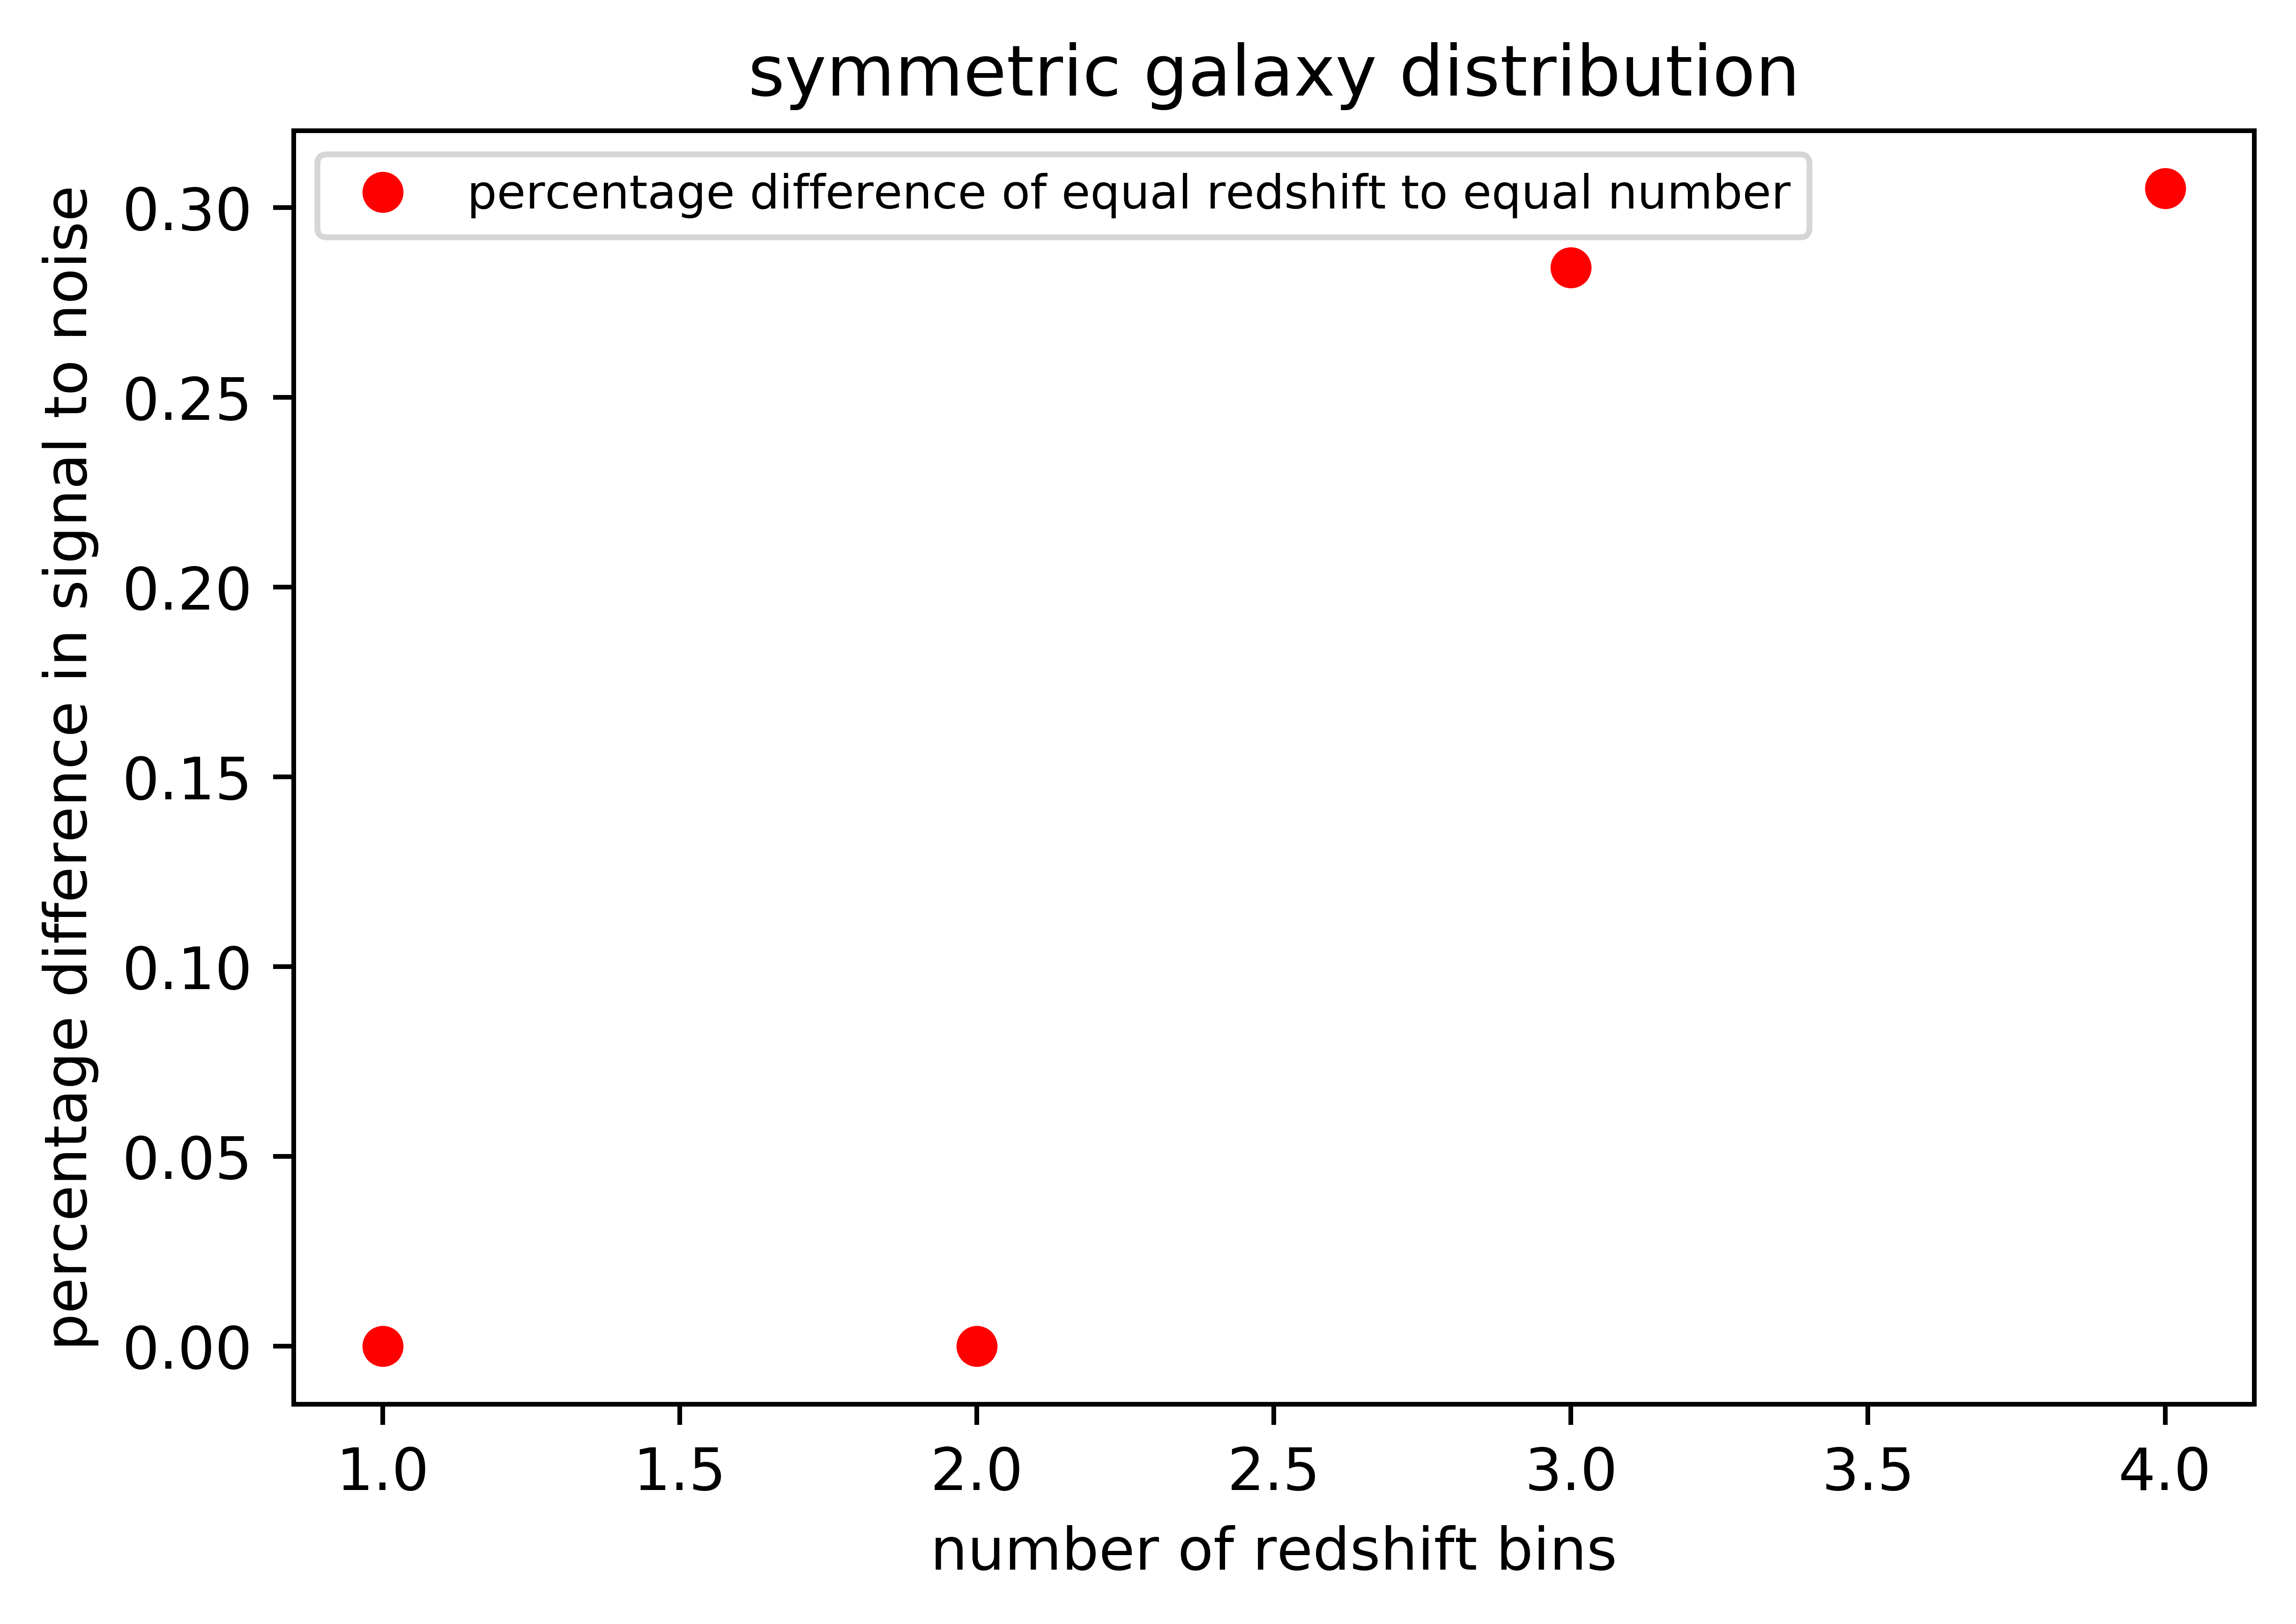

In [25]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [stn_s["z_1"]/stn_s["n_1"]-1, stn_s["z_2"]/stn_s["n_2"]-1, stn_s["z_3"]/stn_s["n_3"]-1, stn_s["z_4"]/stn_s["n_4"]-1],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "percentage difference of equal redshift to equal number")
plt.xlabel("number of redshift bins")
plt.ylabel("percentage difference in signal to noise")
plt.legend(loc="upper left", fontsize=8)
plt.title('symmetric galaxy distribution')
plt.show() 

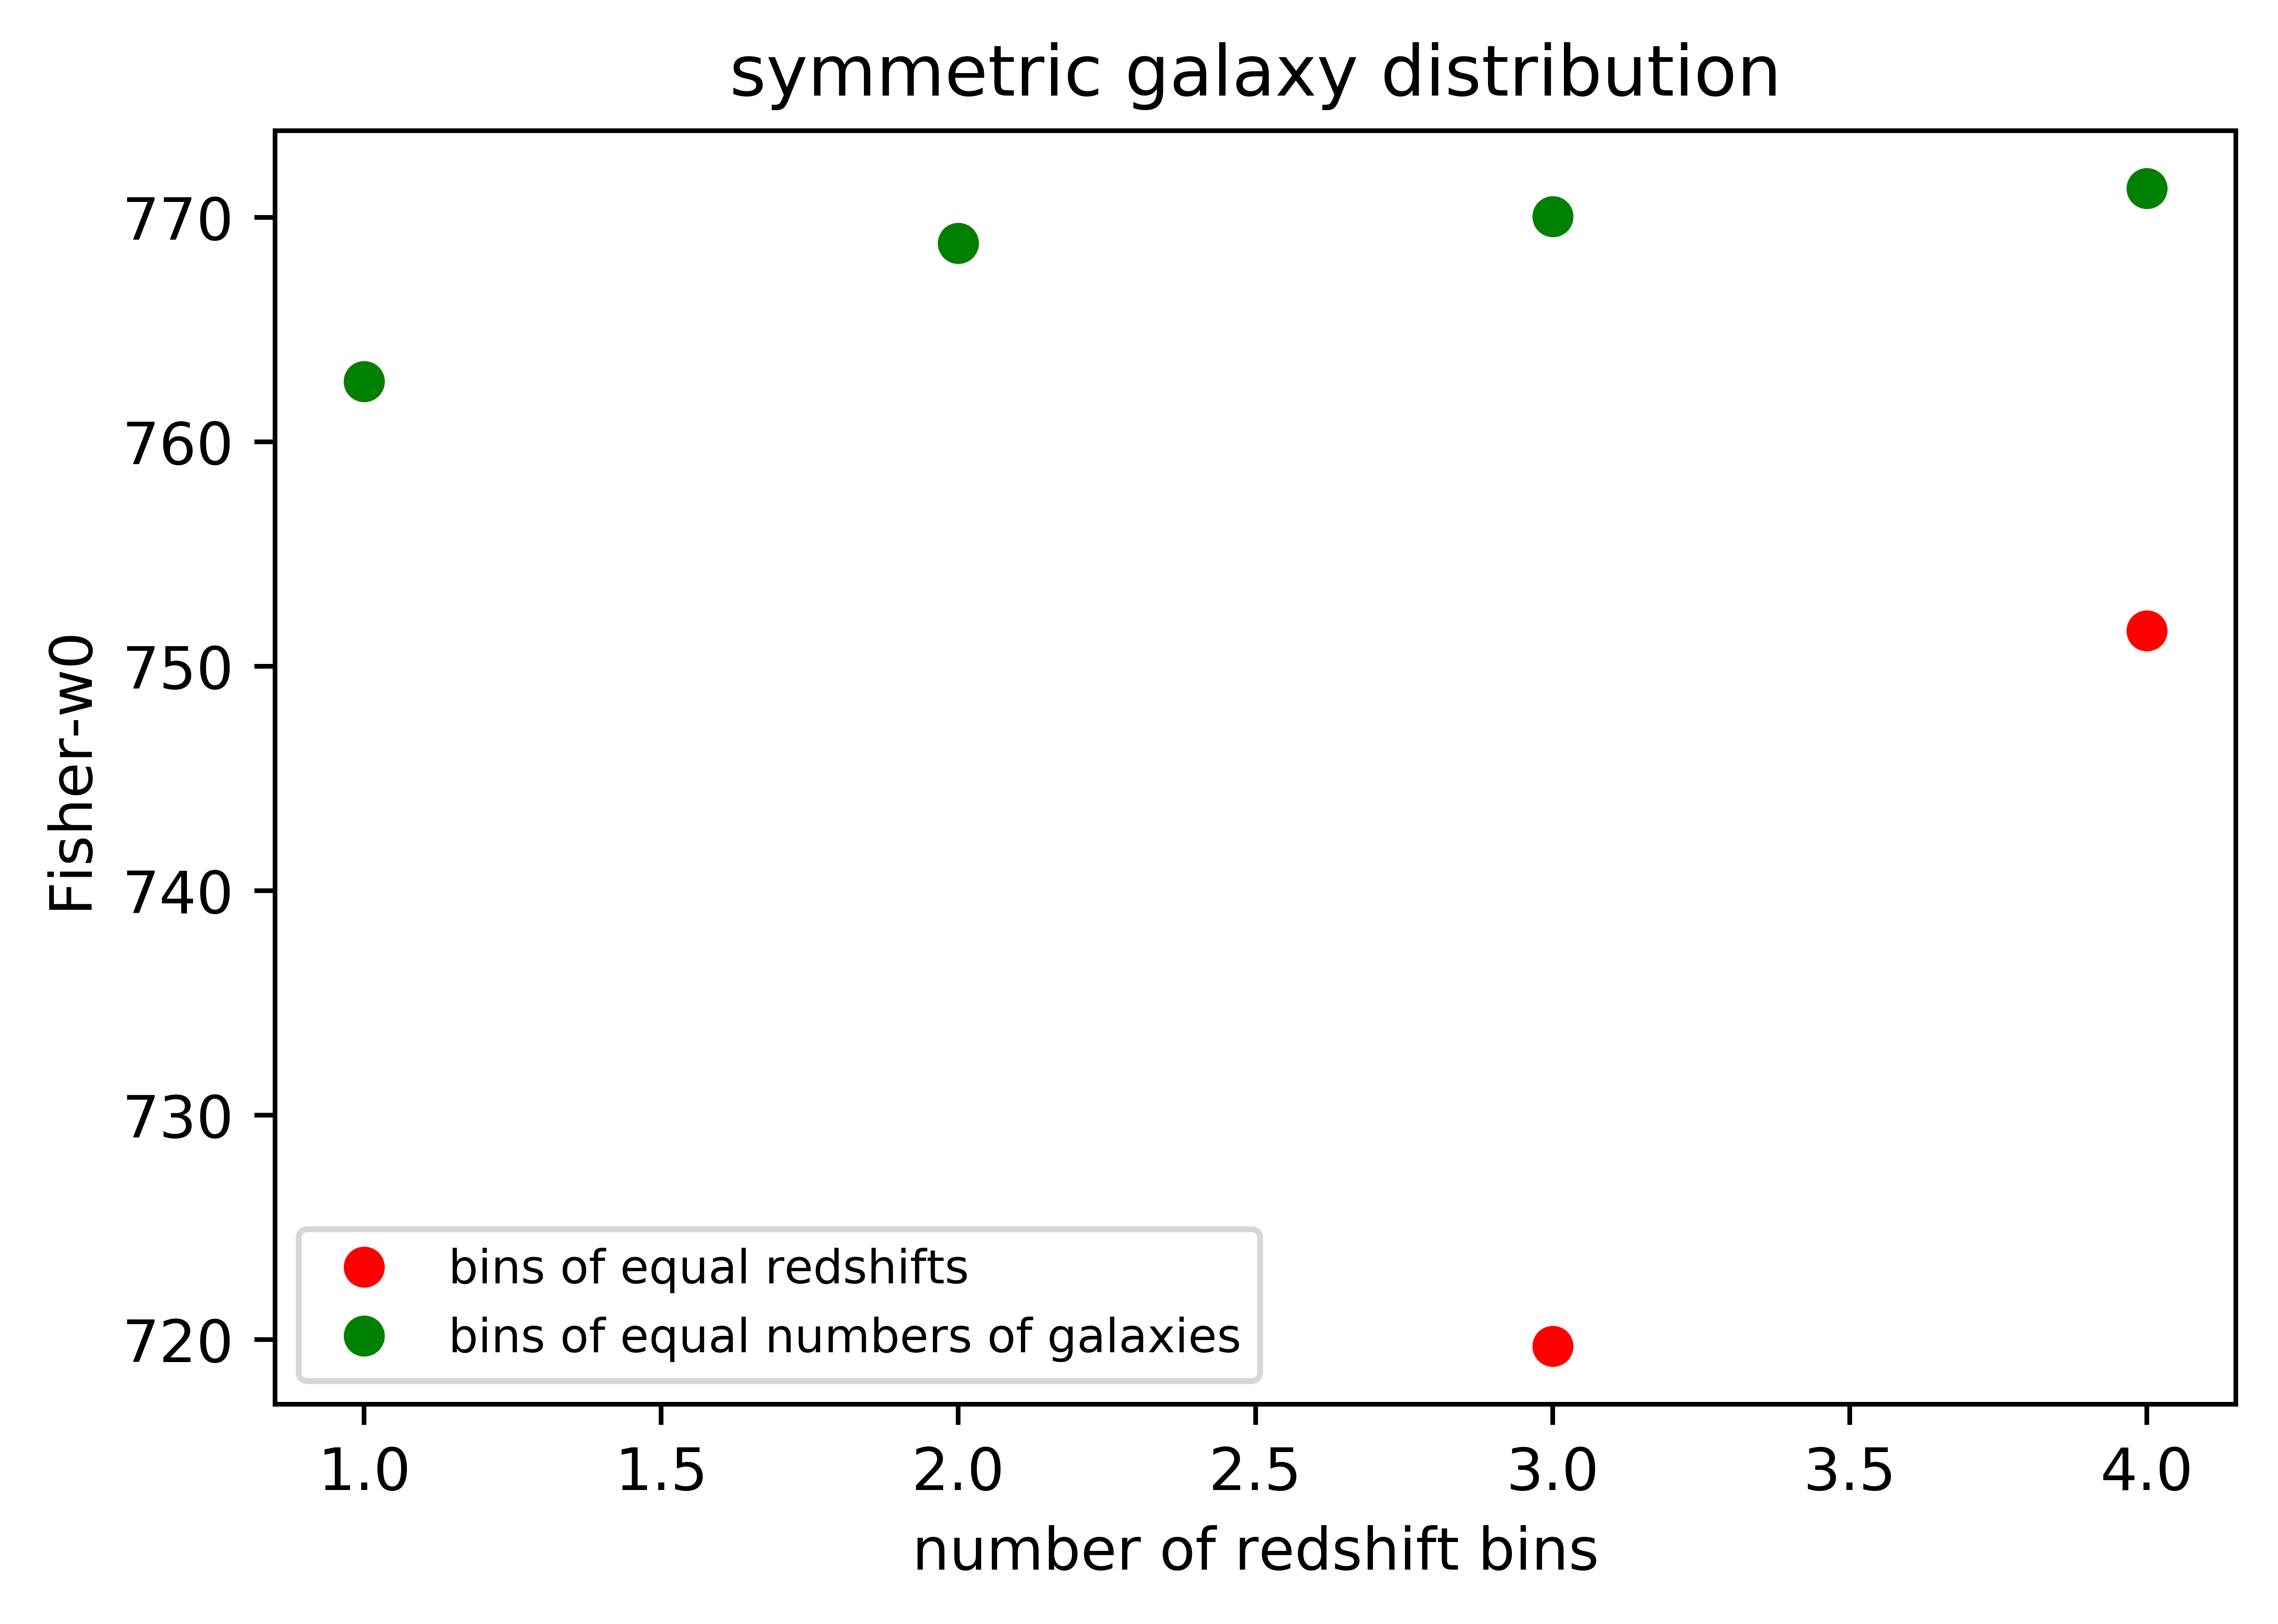

In [24]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [fisher_s["z_1"][3,3], fisher_s["z_2"][3,3], fisher_s["z_3"][3,3], fisher_s["z_4"][3,3]],
         color='r', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal redshifts")
plt.plot([1, 2, 3, 4], [fisher_s["n_1"][3,3], fisher_s["n_2"][3,3], fisher_s["n_3"][3,3], fisher_s["n_4"][3,3]],
         color='g', linestyle='None', marker ="o", markersize = 6.0, label = "bins of equal numbers of galaxies")
plt.xlabel("number of redshift bins")
plt.ylabel("Fisher-w0")
plt.legend(loc="lower left", fontsize=8)
plt.title('symmetric galaxy distribution')
plt.show() 

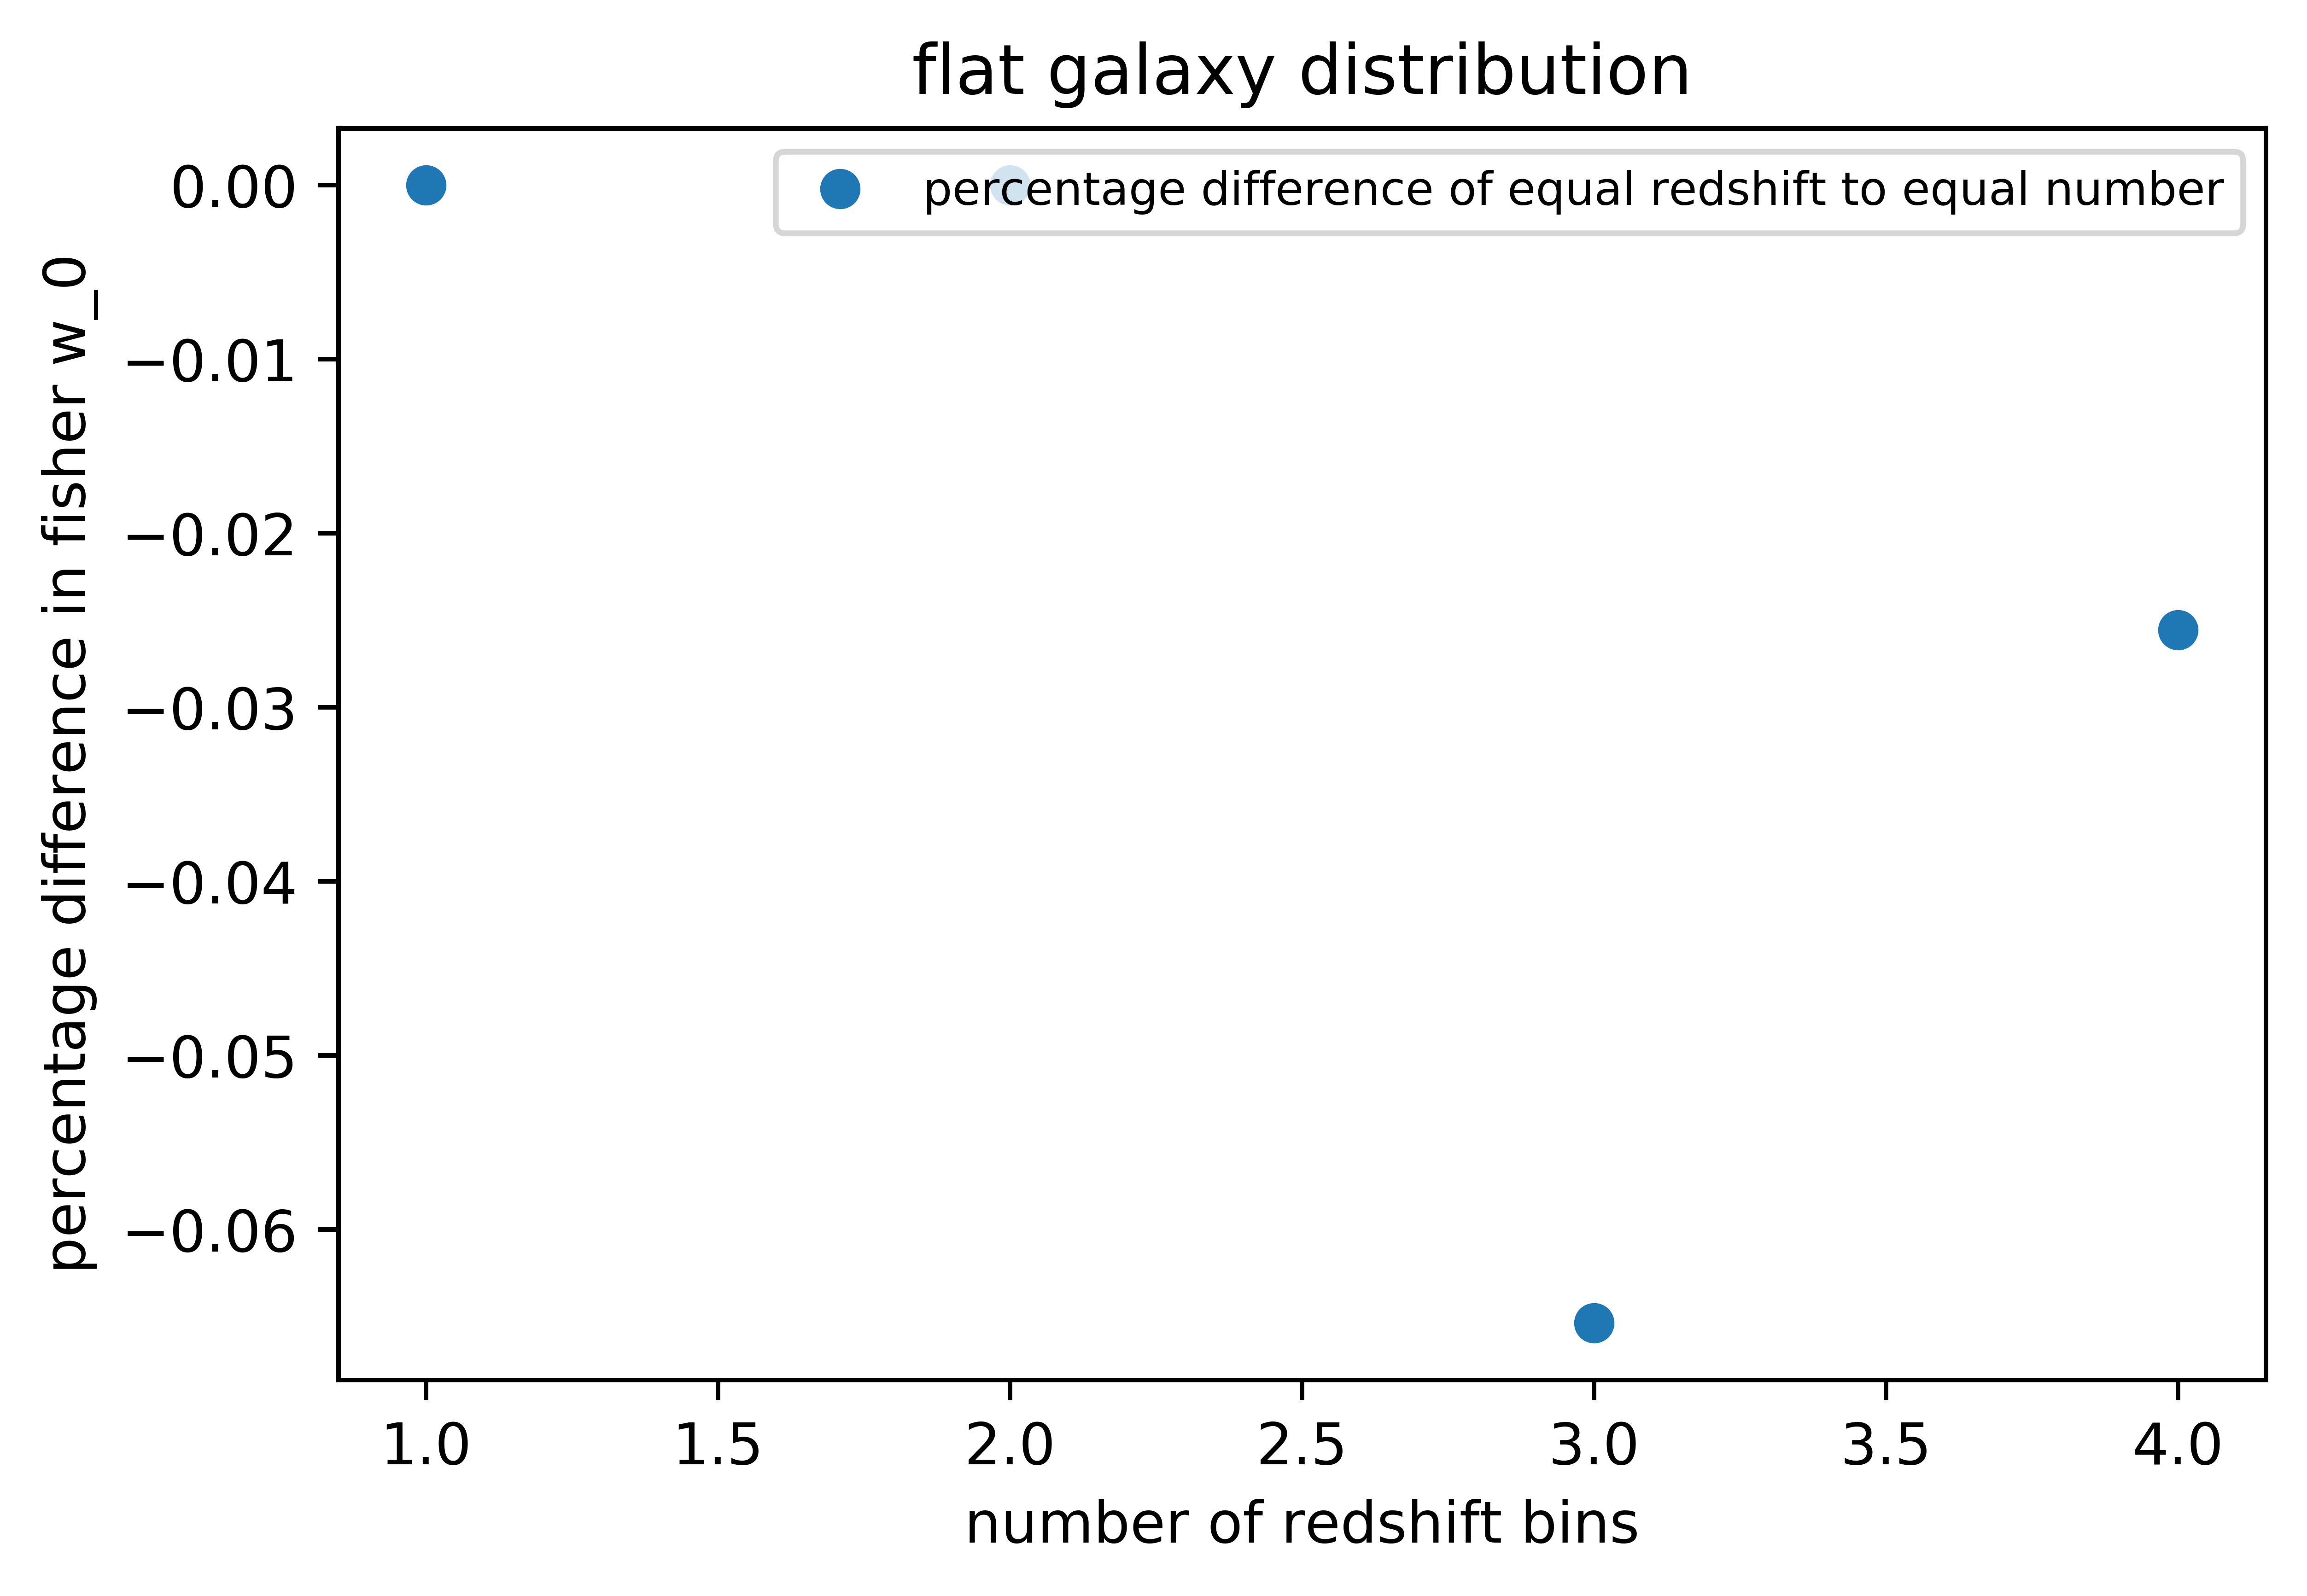

In [23]:
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.figure()
plt.plot([1, 2, 3, 4], [fisher_s["z_1"][3,3]/fisher_s["n_1"][3,3]-1, fisher_s["z_2"][3,3]/fisher_s["n_2"][3,3]-1, fisher_s["z_3"][3,3]/fisher_s["n_3"][3,3]-1, fisher_s["z_4"][3,3]/fisher_s["n_4"][3,3]-1],
        linestyle='None', marker ="o", label = "percentage difference of equal redshift to equal number")
plt.xlabel("number of redshift bins")
plt.ylabel("percentage difference in fisher w_0 ")
plt.legend(loc="upper right", fontsize=8)
plt.title('flat galaxy distribution')
plt.show() 

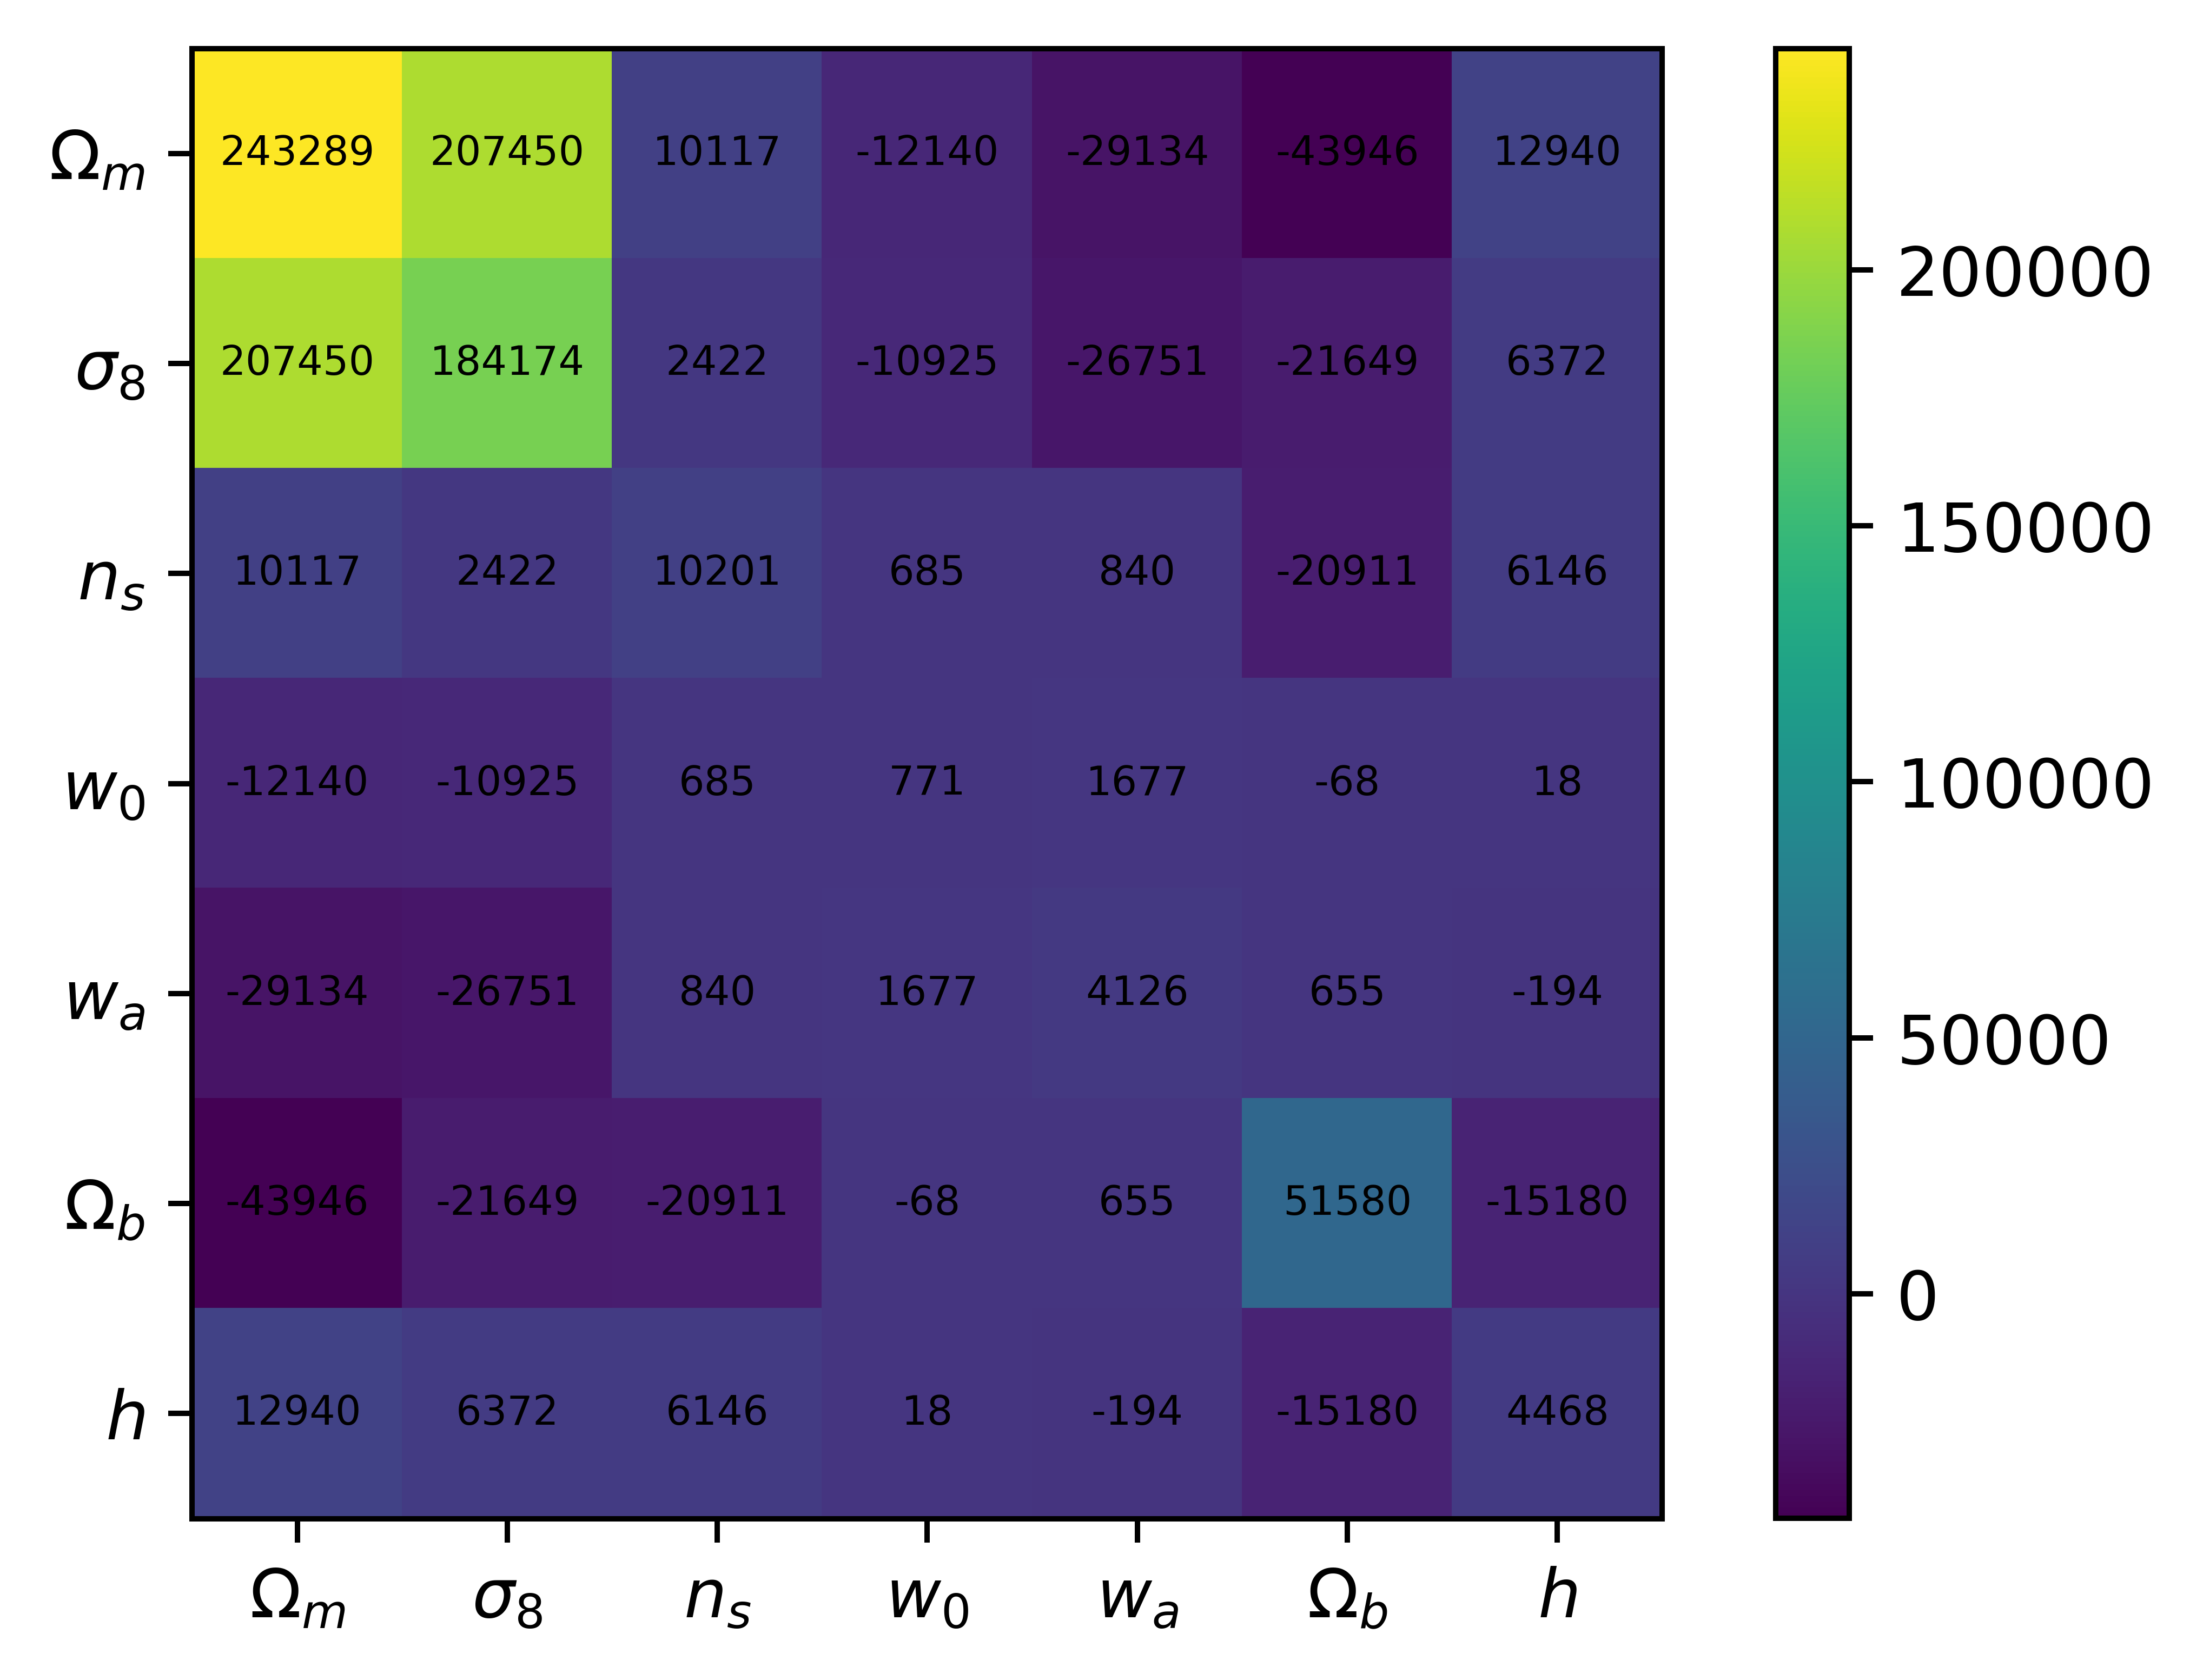

In [27]:
plt.imshow(fisher_s["n_4"])
plt.colorbar()
param_labels = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$w_0$', r'$w_a$', r'$\Omega_b$', r'$h$']
plt.xticks(np.arange(7), param_labels)
plt.yticks(np.arange(7), param_labels)
for i in range(7):
    for j in range(7):
        c = fisher_s['n_4'][j,i]
        plt.text(i, j, "%.0f"%(c), va='center', ha='center', fontsize=6)

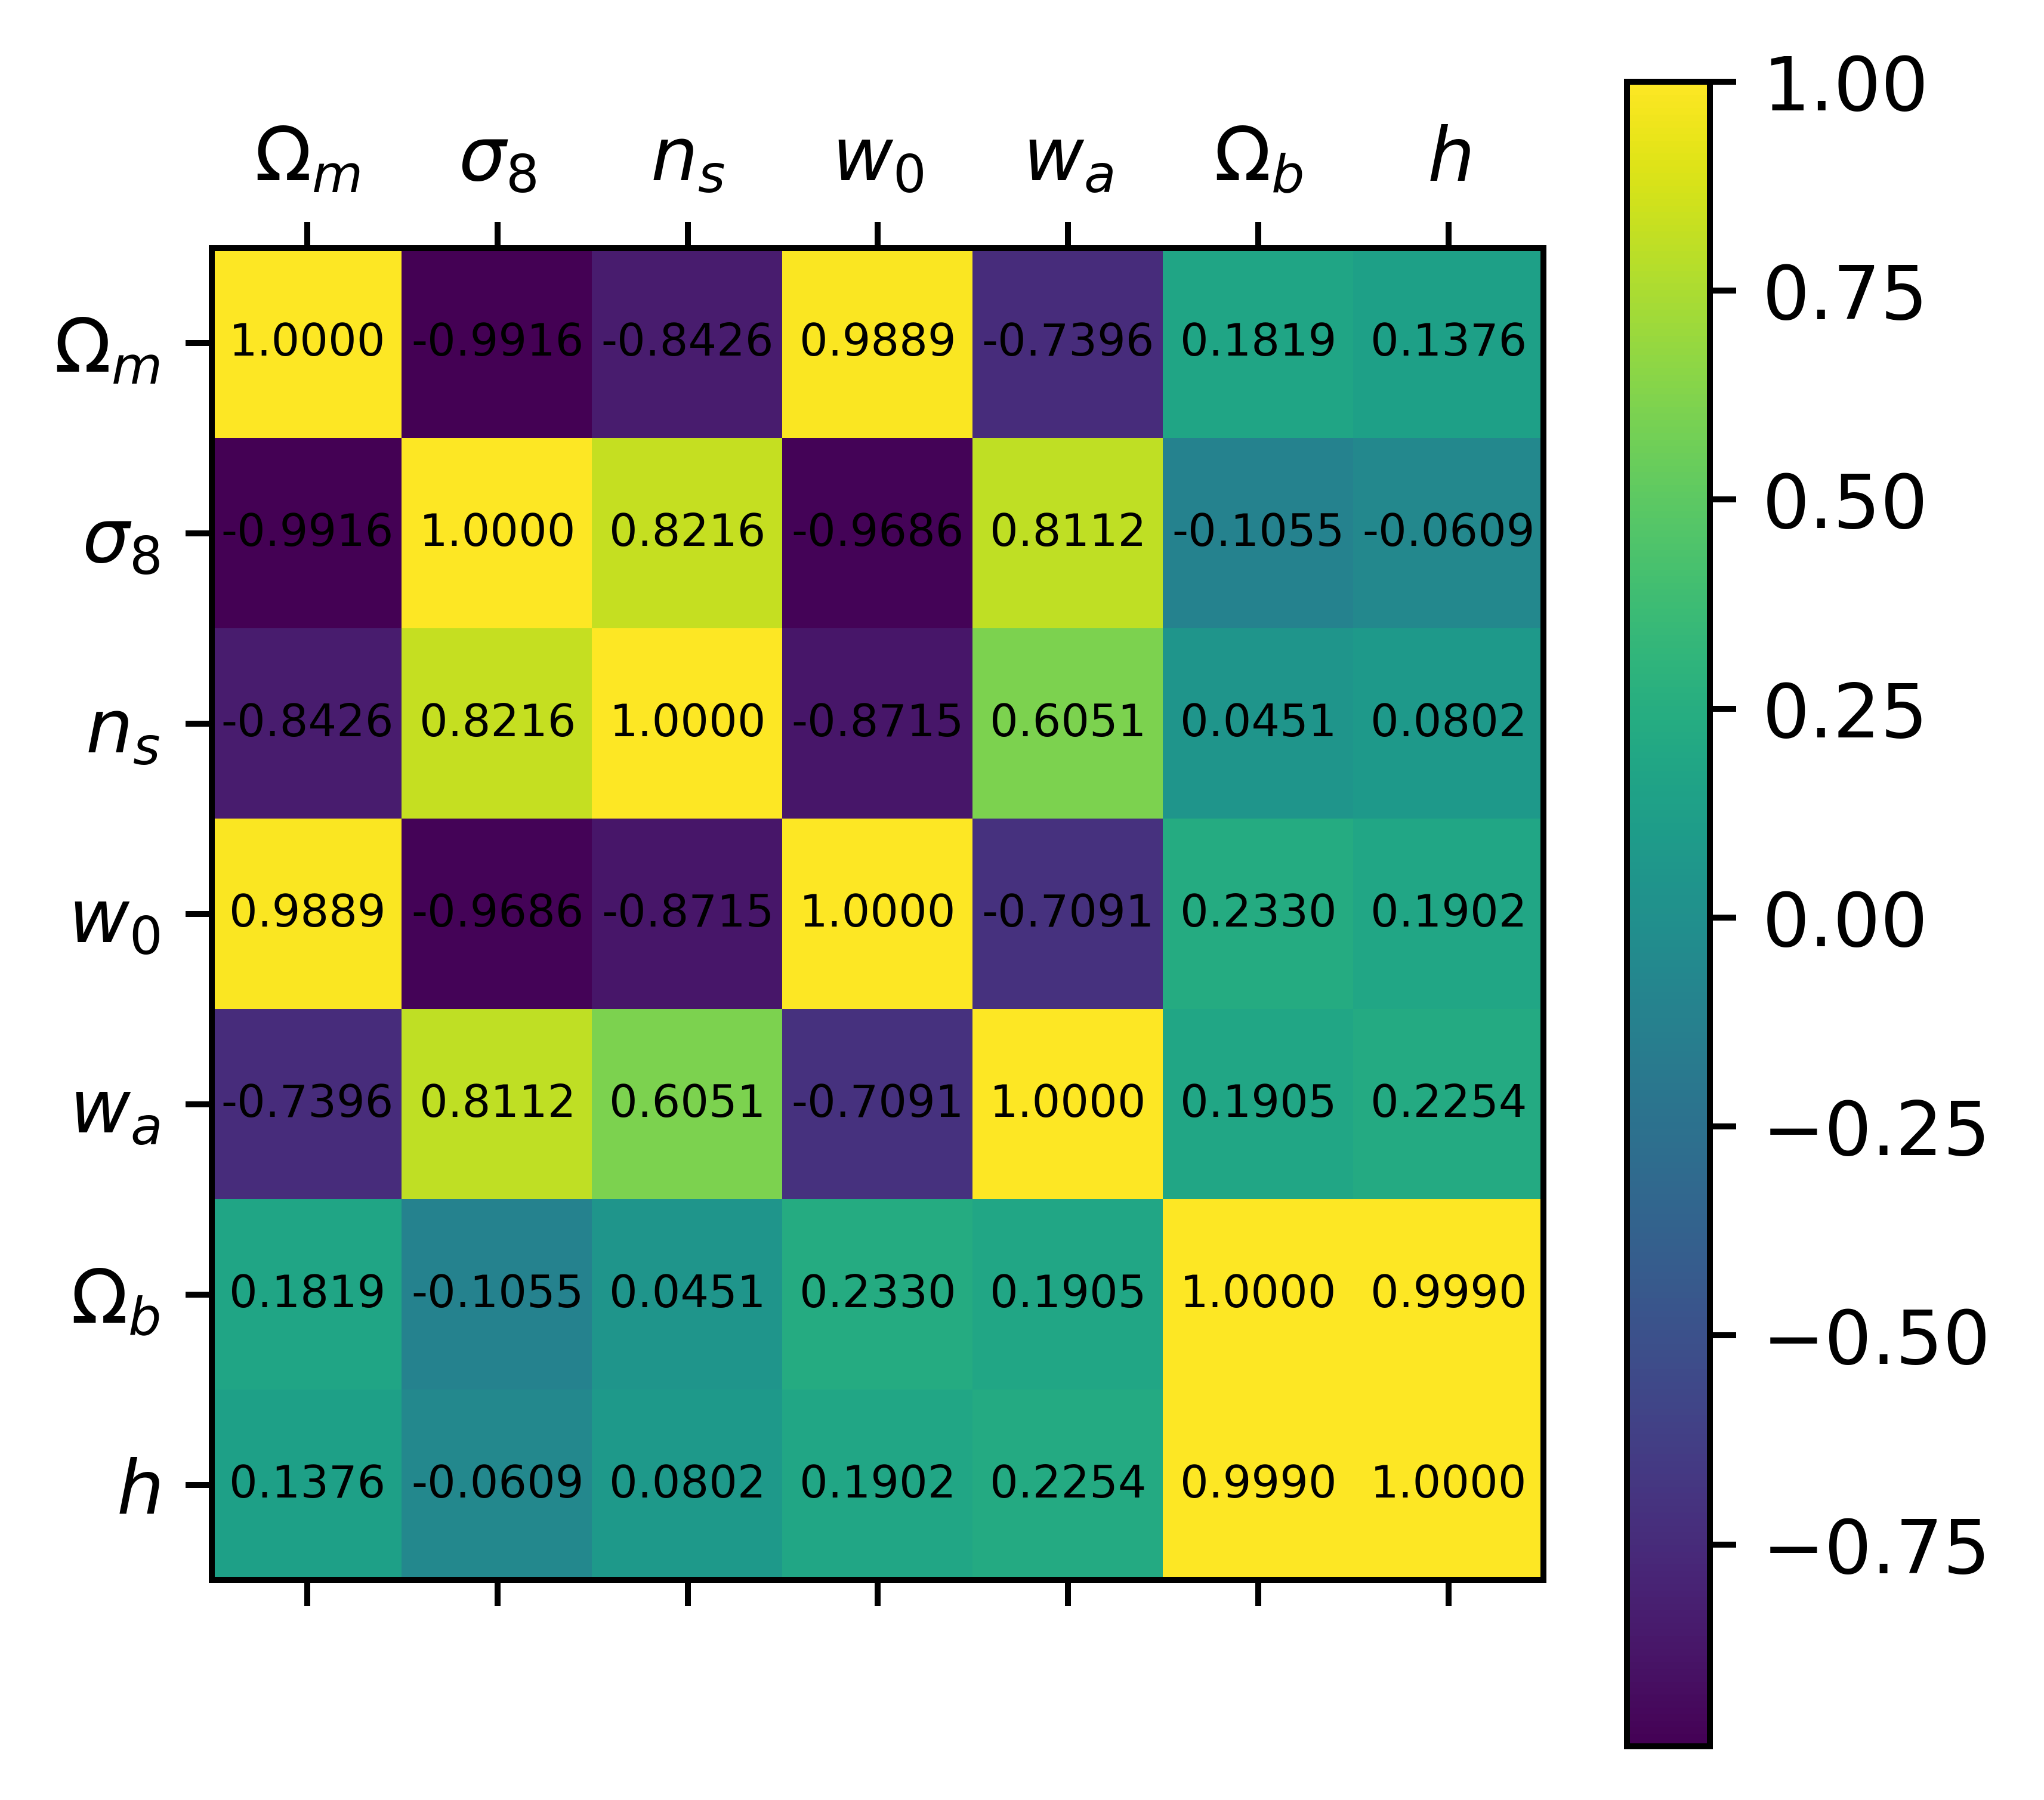

In [28]:
covar_p_s ={}
cor_p_s = {}

covar_p_s["n_4"] = cov_cosmo_para(fisher_s["n_4"])
cor_p_s["n_4"] = corr_cosmo_para(covar_p_s["n_4"])

plot_corr(cor_p_s["n_4"])

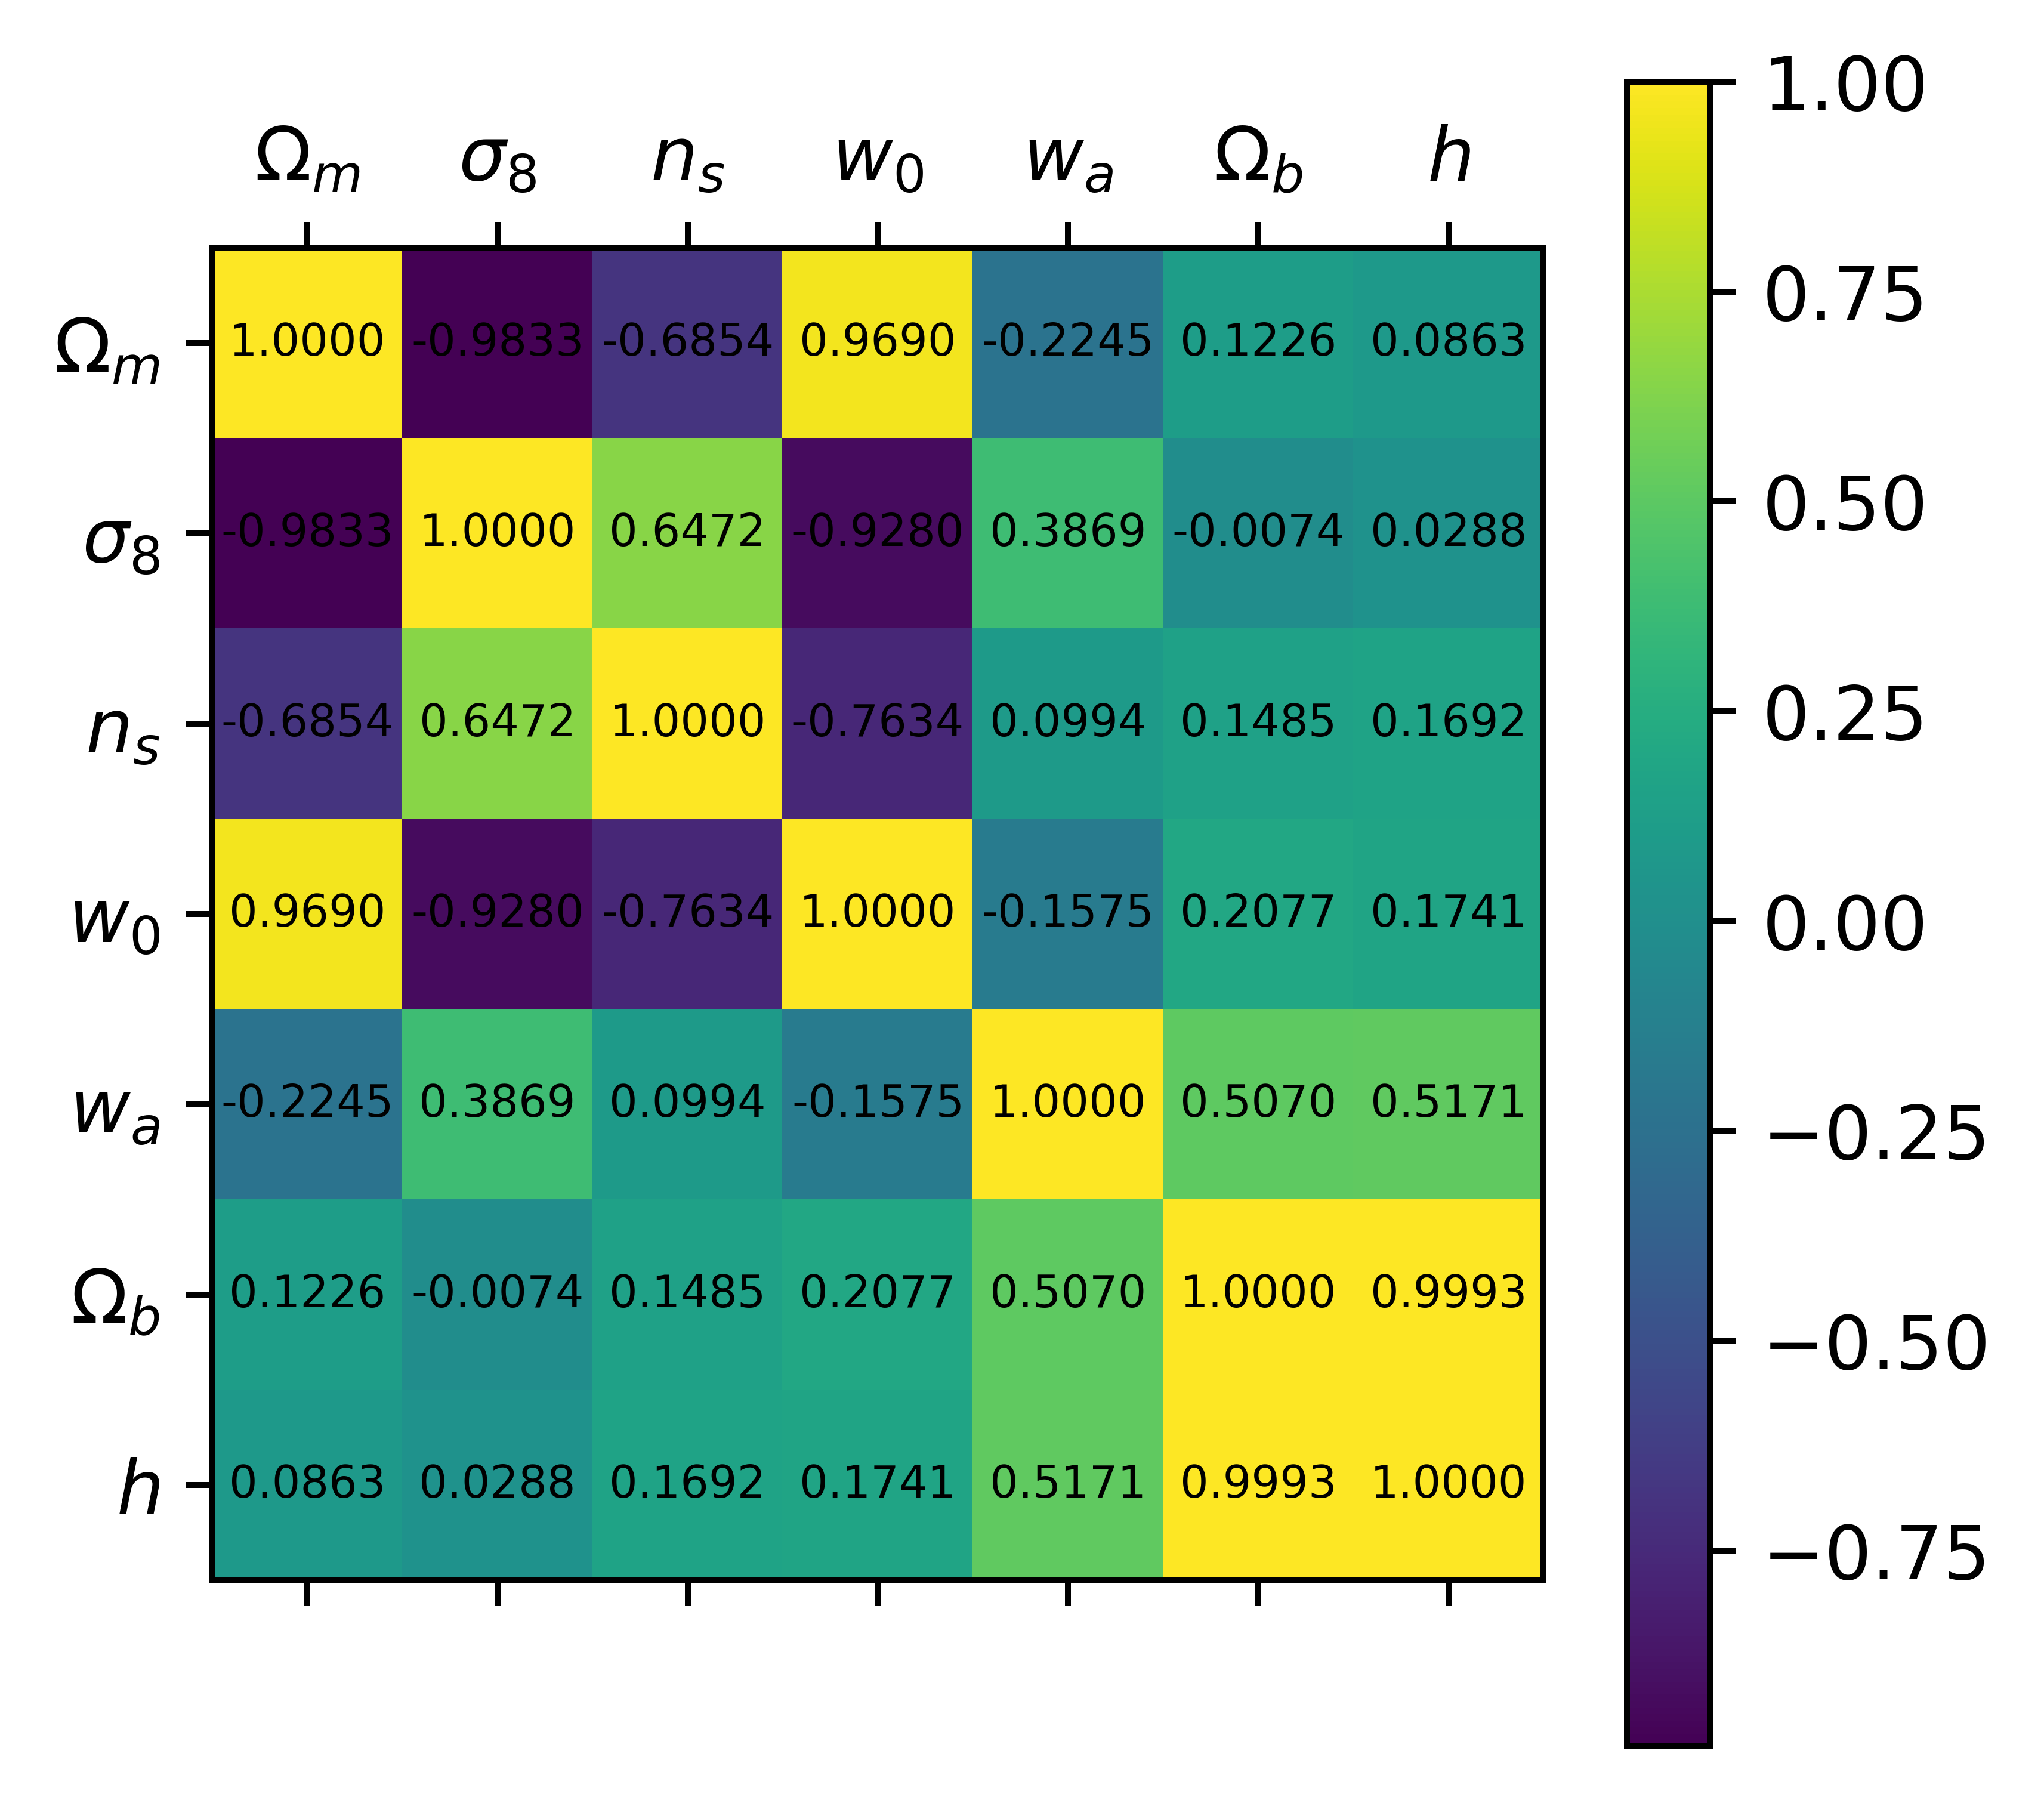

In [29]:
covar_p_s["z_4"] = cov_cosmo_para(fisher_s["z_4"])
cor_p_s["z_4"] = corr_cosmo_para(covar_p_s["z_4"])

plot_corr(cor_p_s["z_4"])

4 bins of equal galaxy number
w_0 = -1 +- 1.1428370450351015

w_a = 0 +- 0.1194977156180643

Figure of Merit for w_0 and w_a is 1.8306111190902619



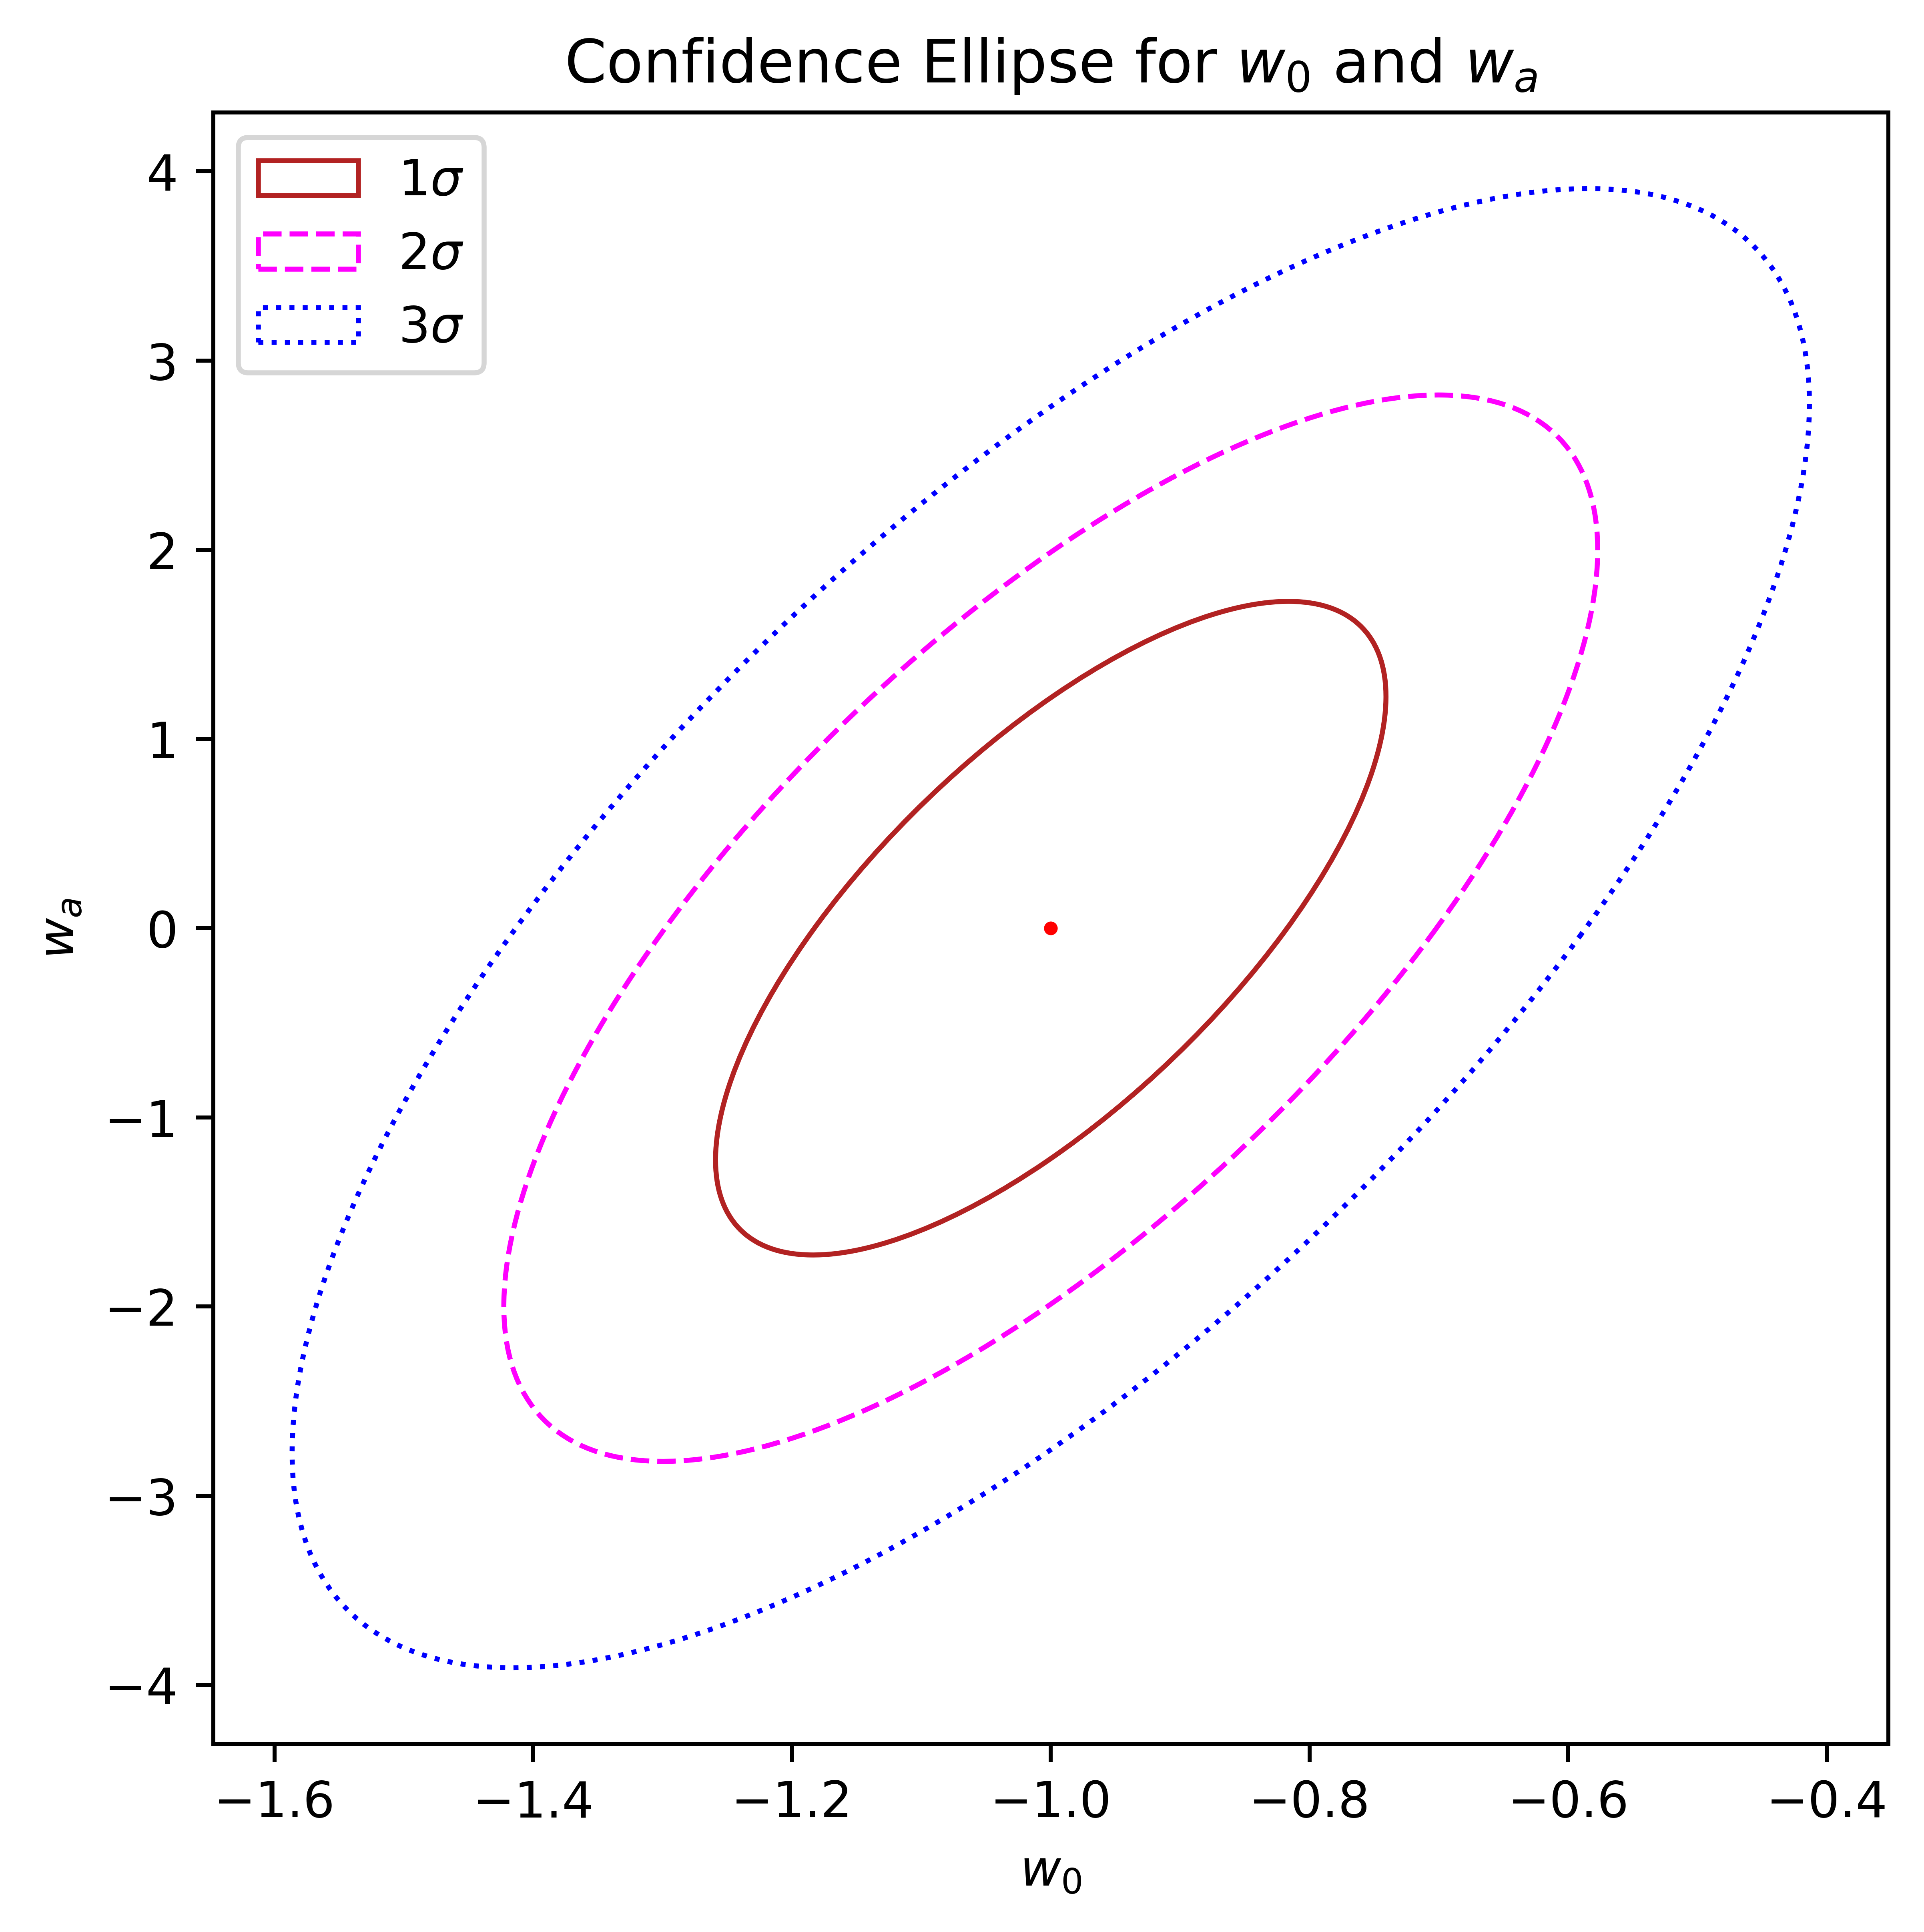

1.8306111190902619

In [31]:
print("4 bins of equal galaxy number")
plotConfidenceEllipse(covar_p_s["n_4"], "w_0", "w_a")

4 bins of equal redshift
w_0 = -1 +- 0.6332214718703716

w_a = 0 +- 0.09354741718009689

Figure of Merit for w_0 and w_a is 4.220389894996736



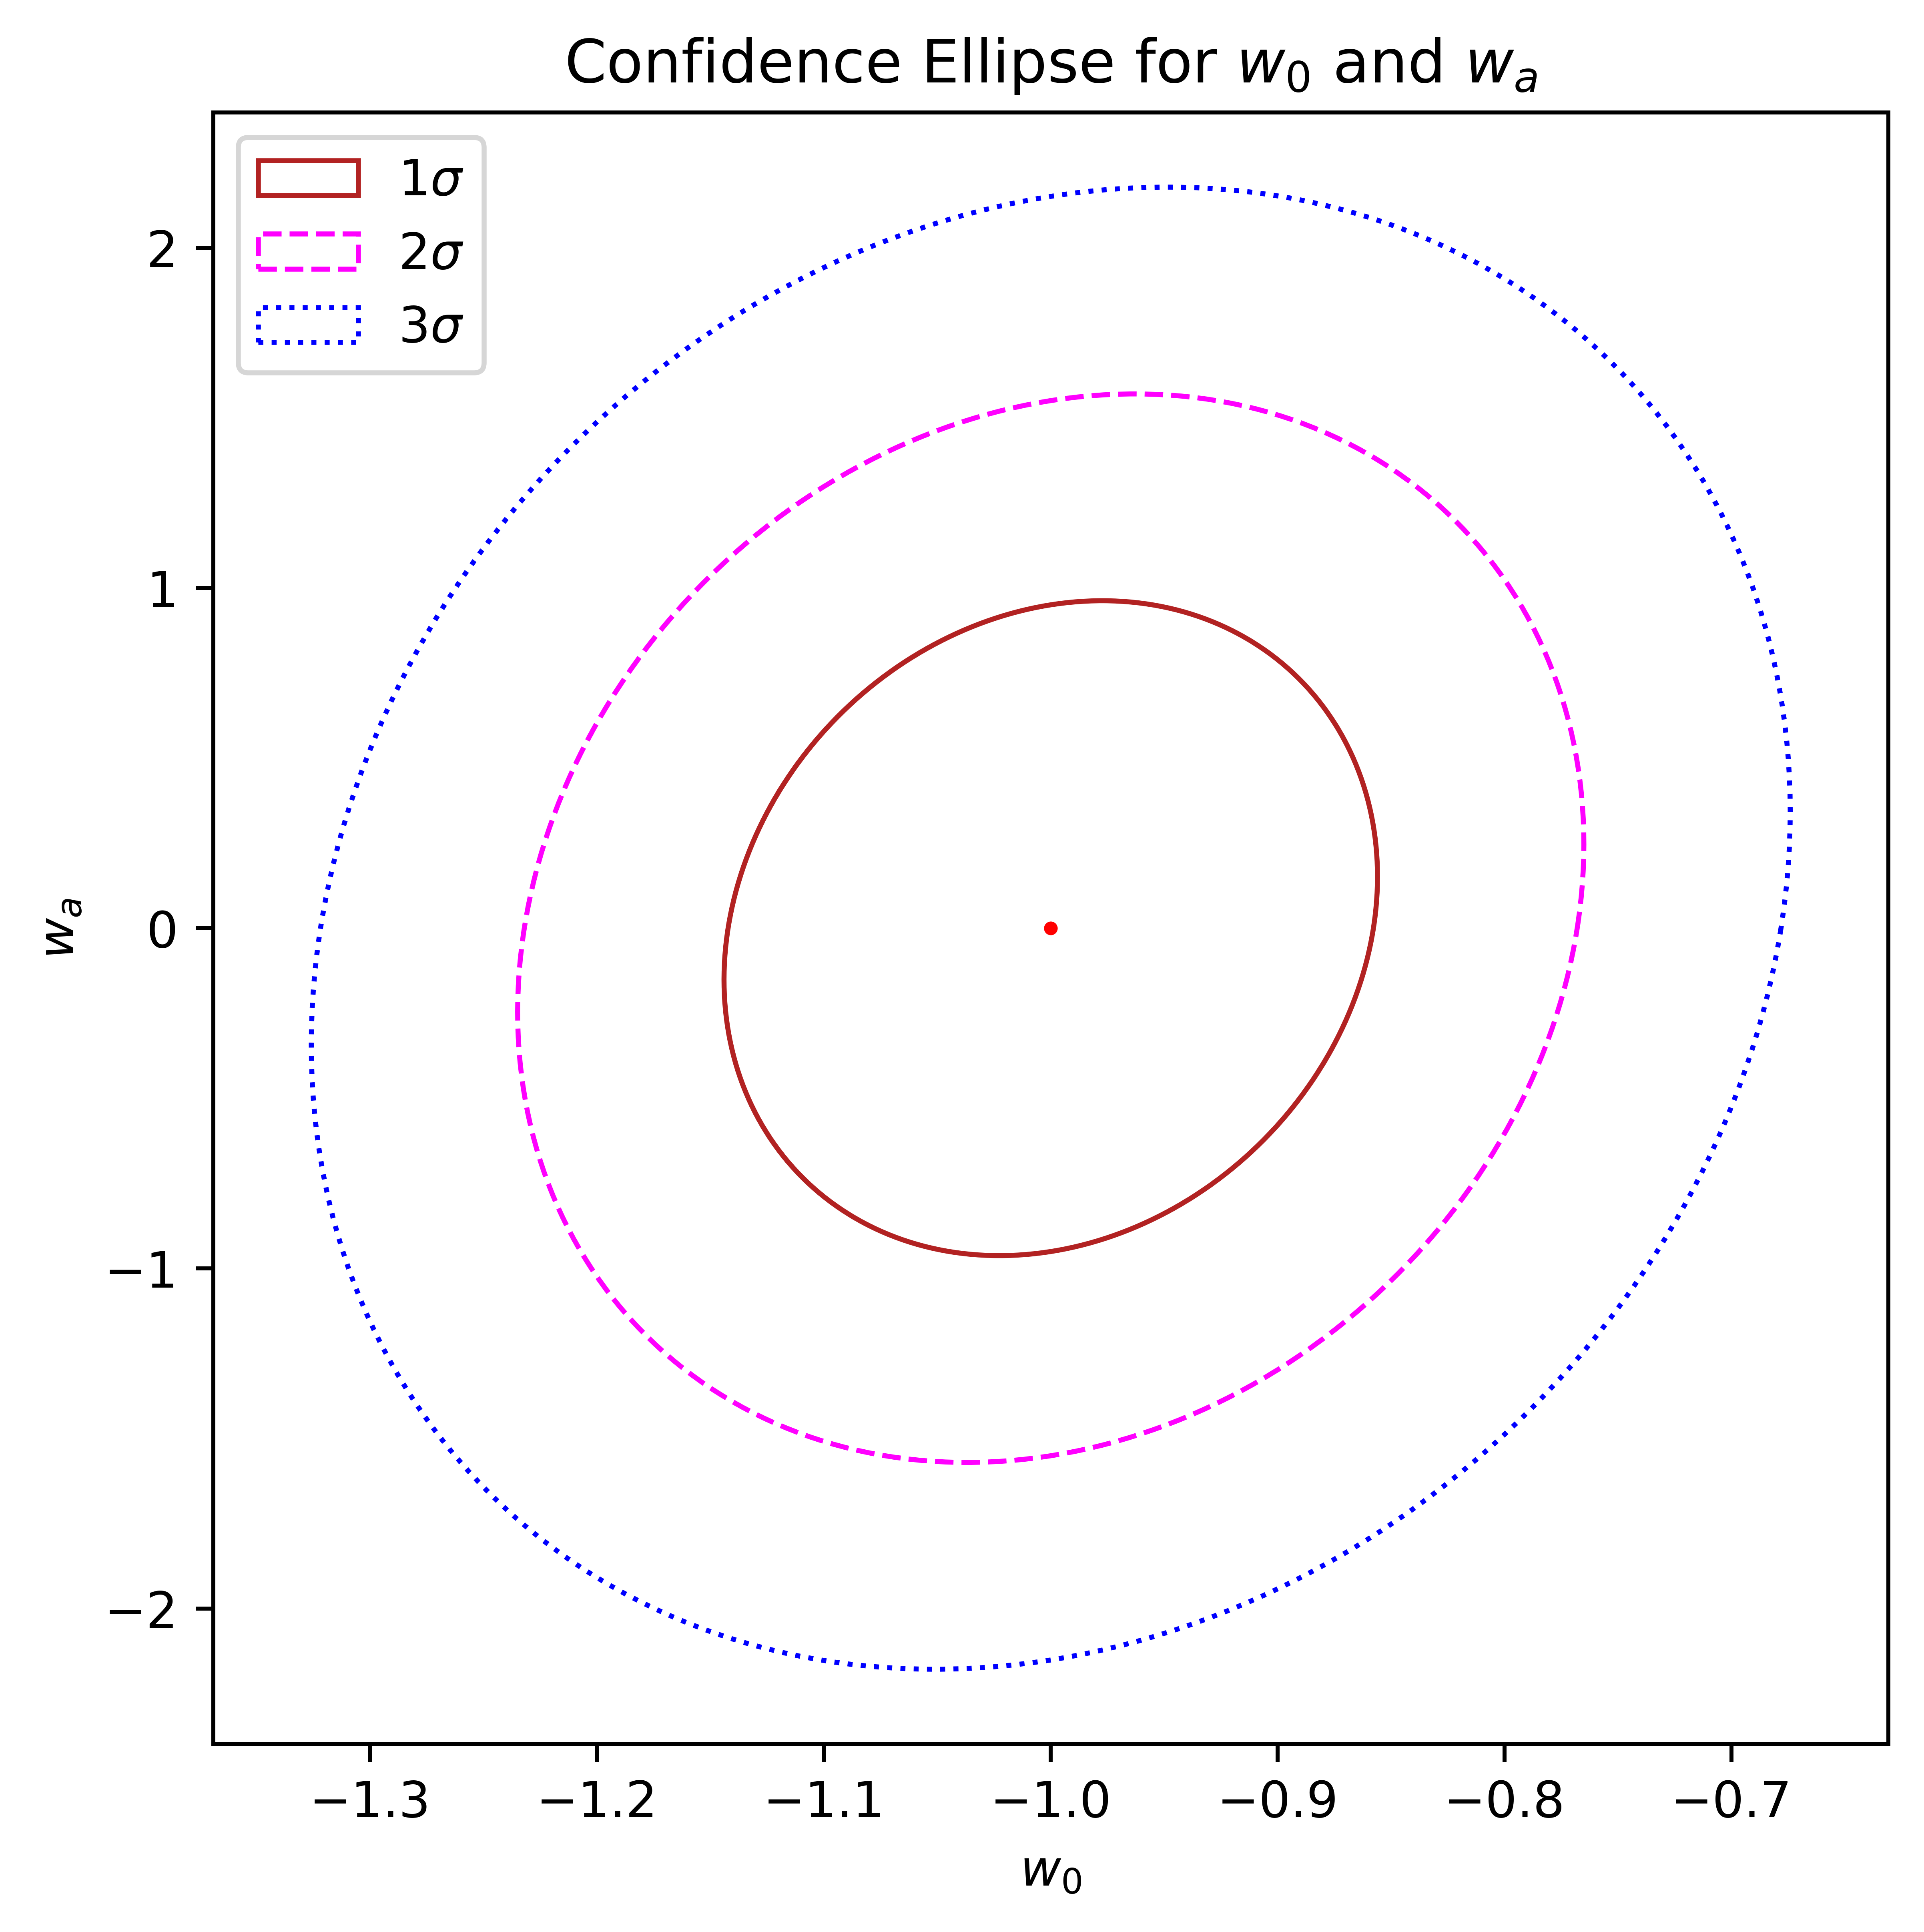

4.220389894996736

In [32]:
print("4 bins of equal redshift")
plotConfidenceEllipse(covar_p_s["z_4"], "w_0", "w_a")

4 bins of equal galaxy number
Omega_m = 0.315 +- 1.6693662720136229

Omega_b = 0.045 +- 0.19780467501763904

Figure of Merit for Omega_m and Omega_b is 0.7570975176089527



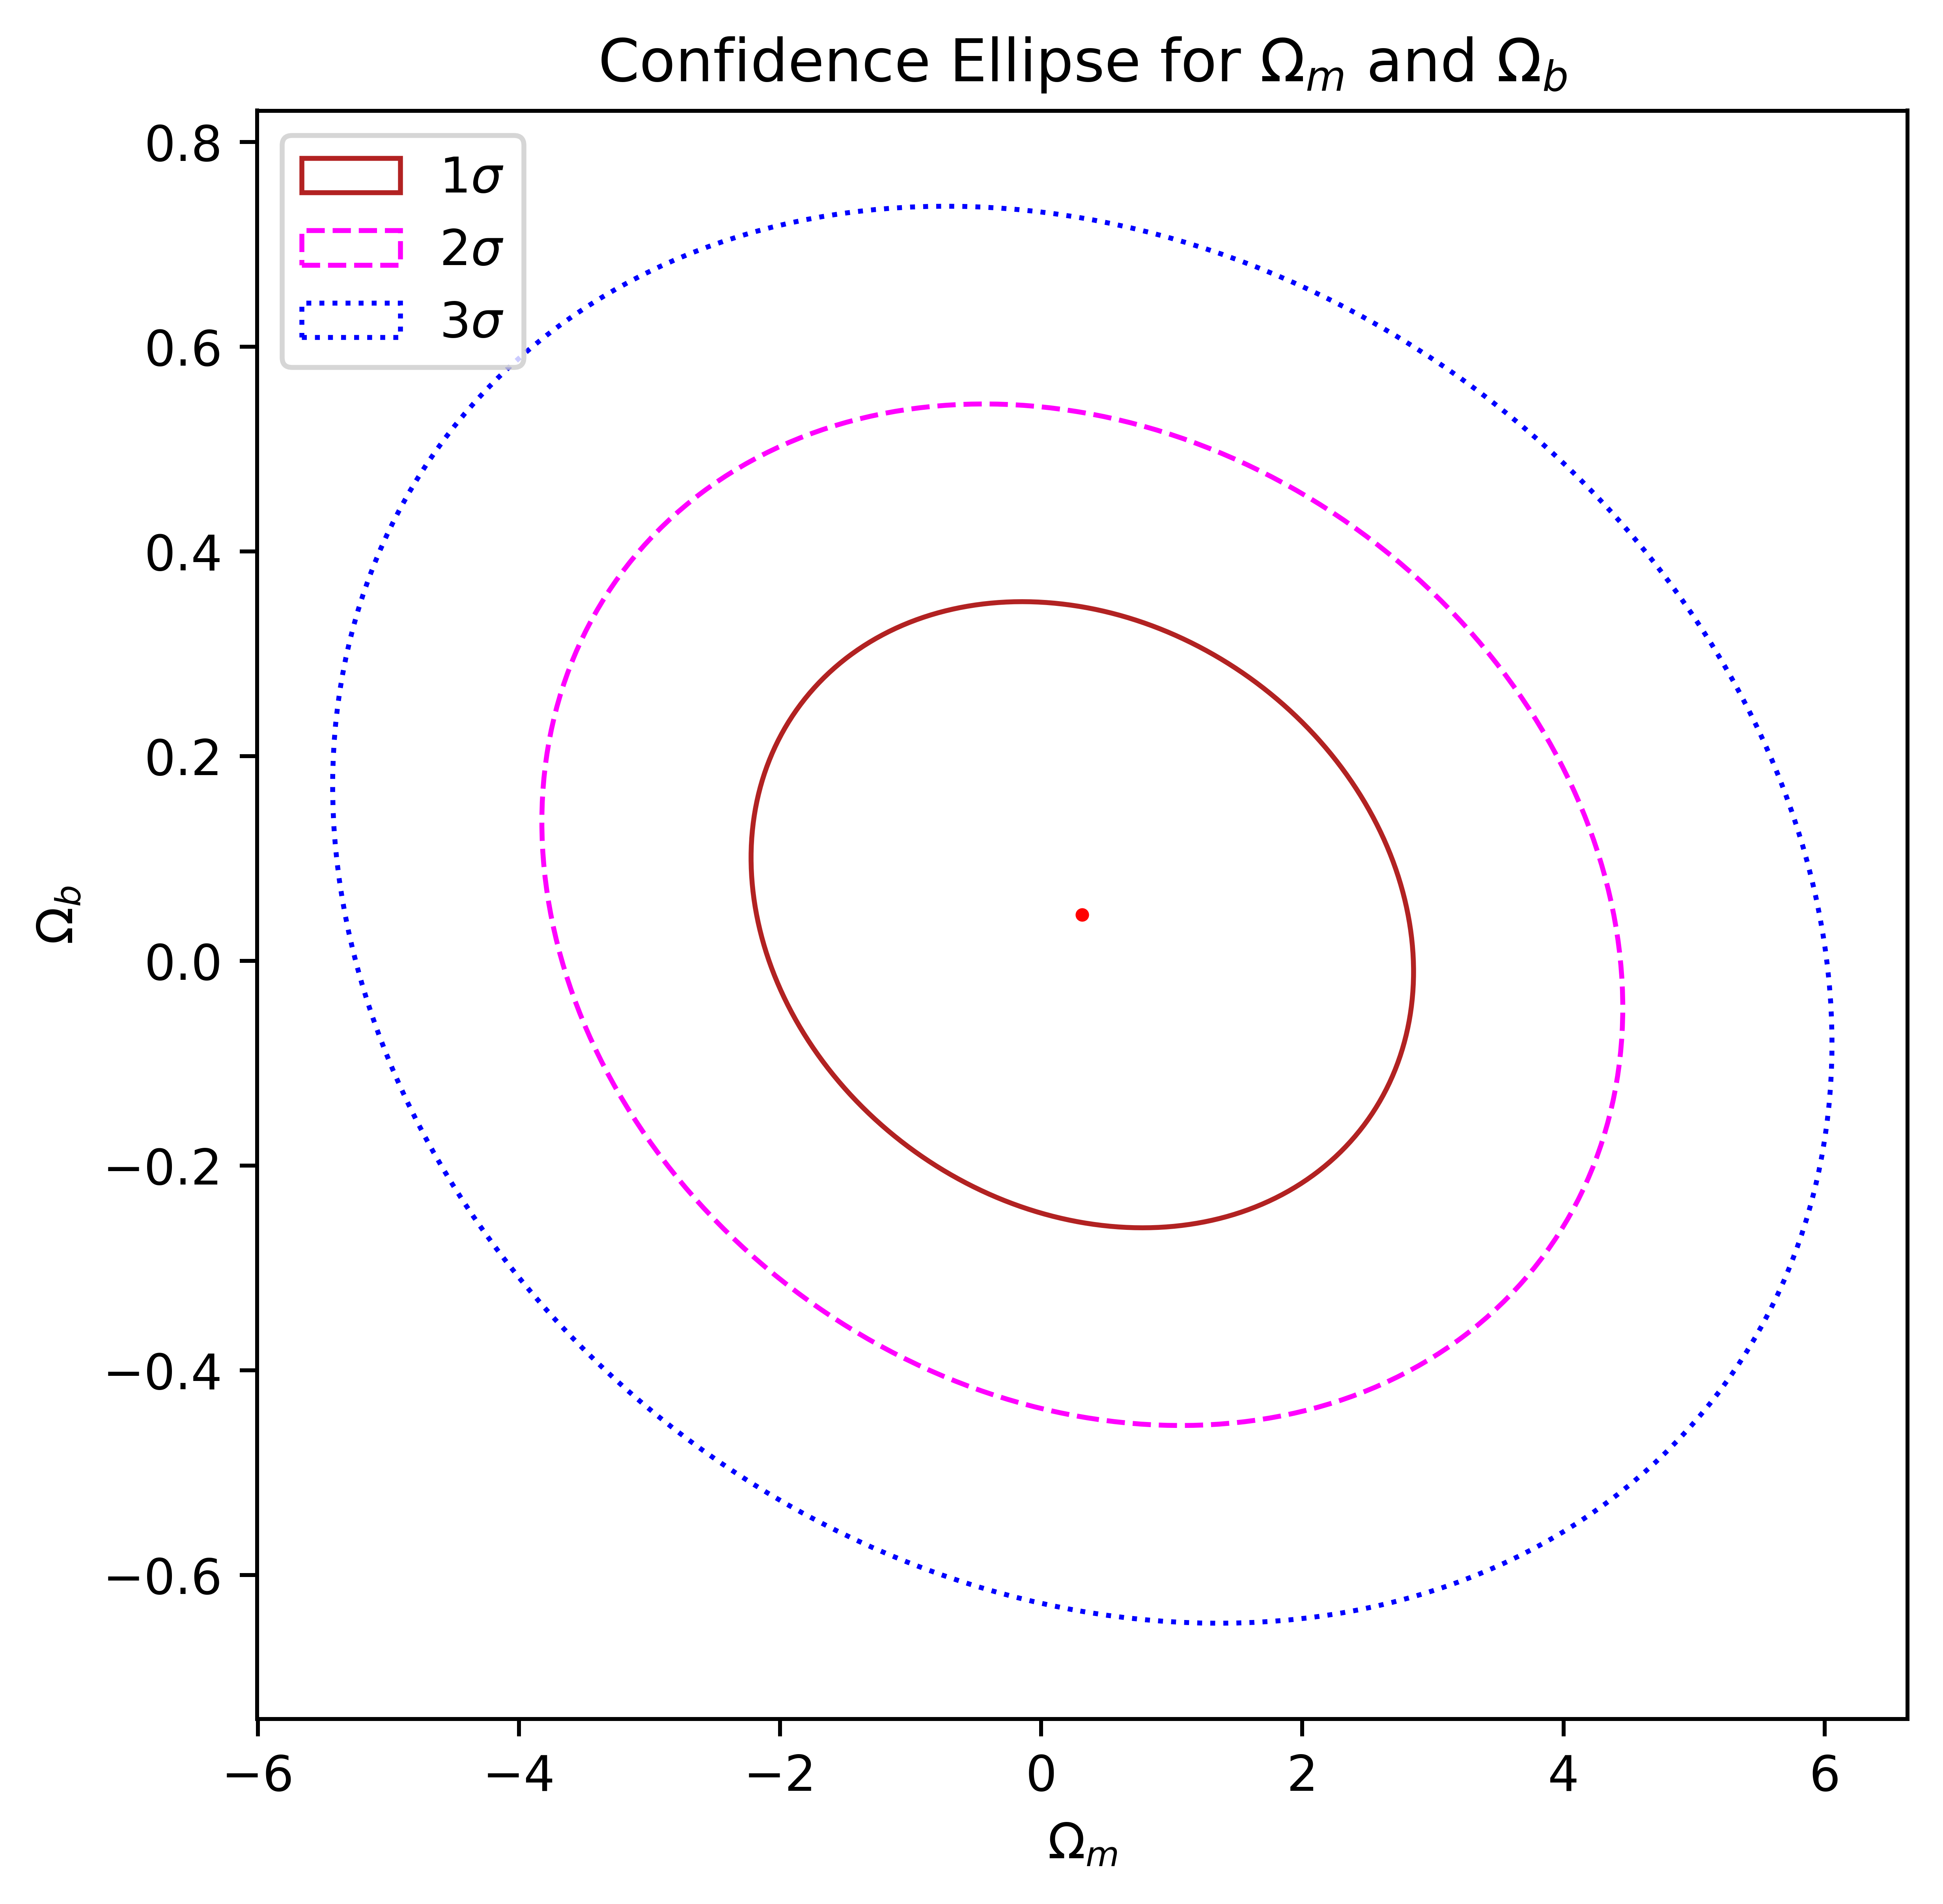

0.7570975176089527

In [33]:
print("4 bins of equal galaxy number")
plotConfidenceEllipse(covar_p_s["n_4"], "Omega_m", "Omega_b")

4 bins of equal redshift
Omega_m = 0.315 +- 1.3923339315428567

Omega_b = 0.045 +- 0.1263157923055652

Figure of Merit for Omega_m and Omega_b is 1.4214741000405549



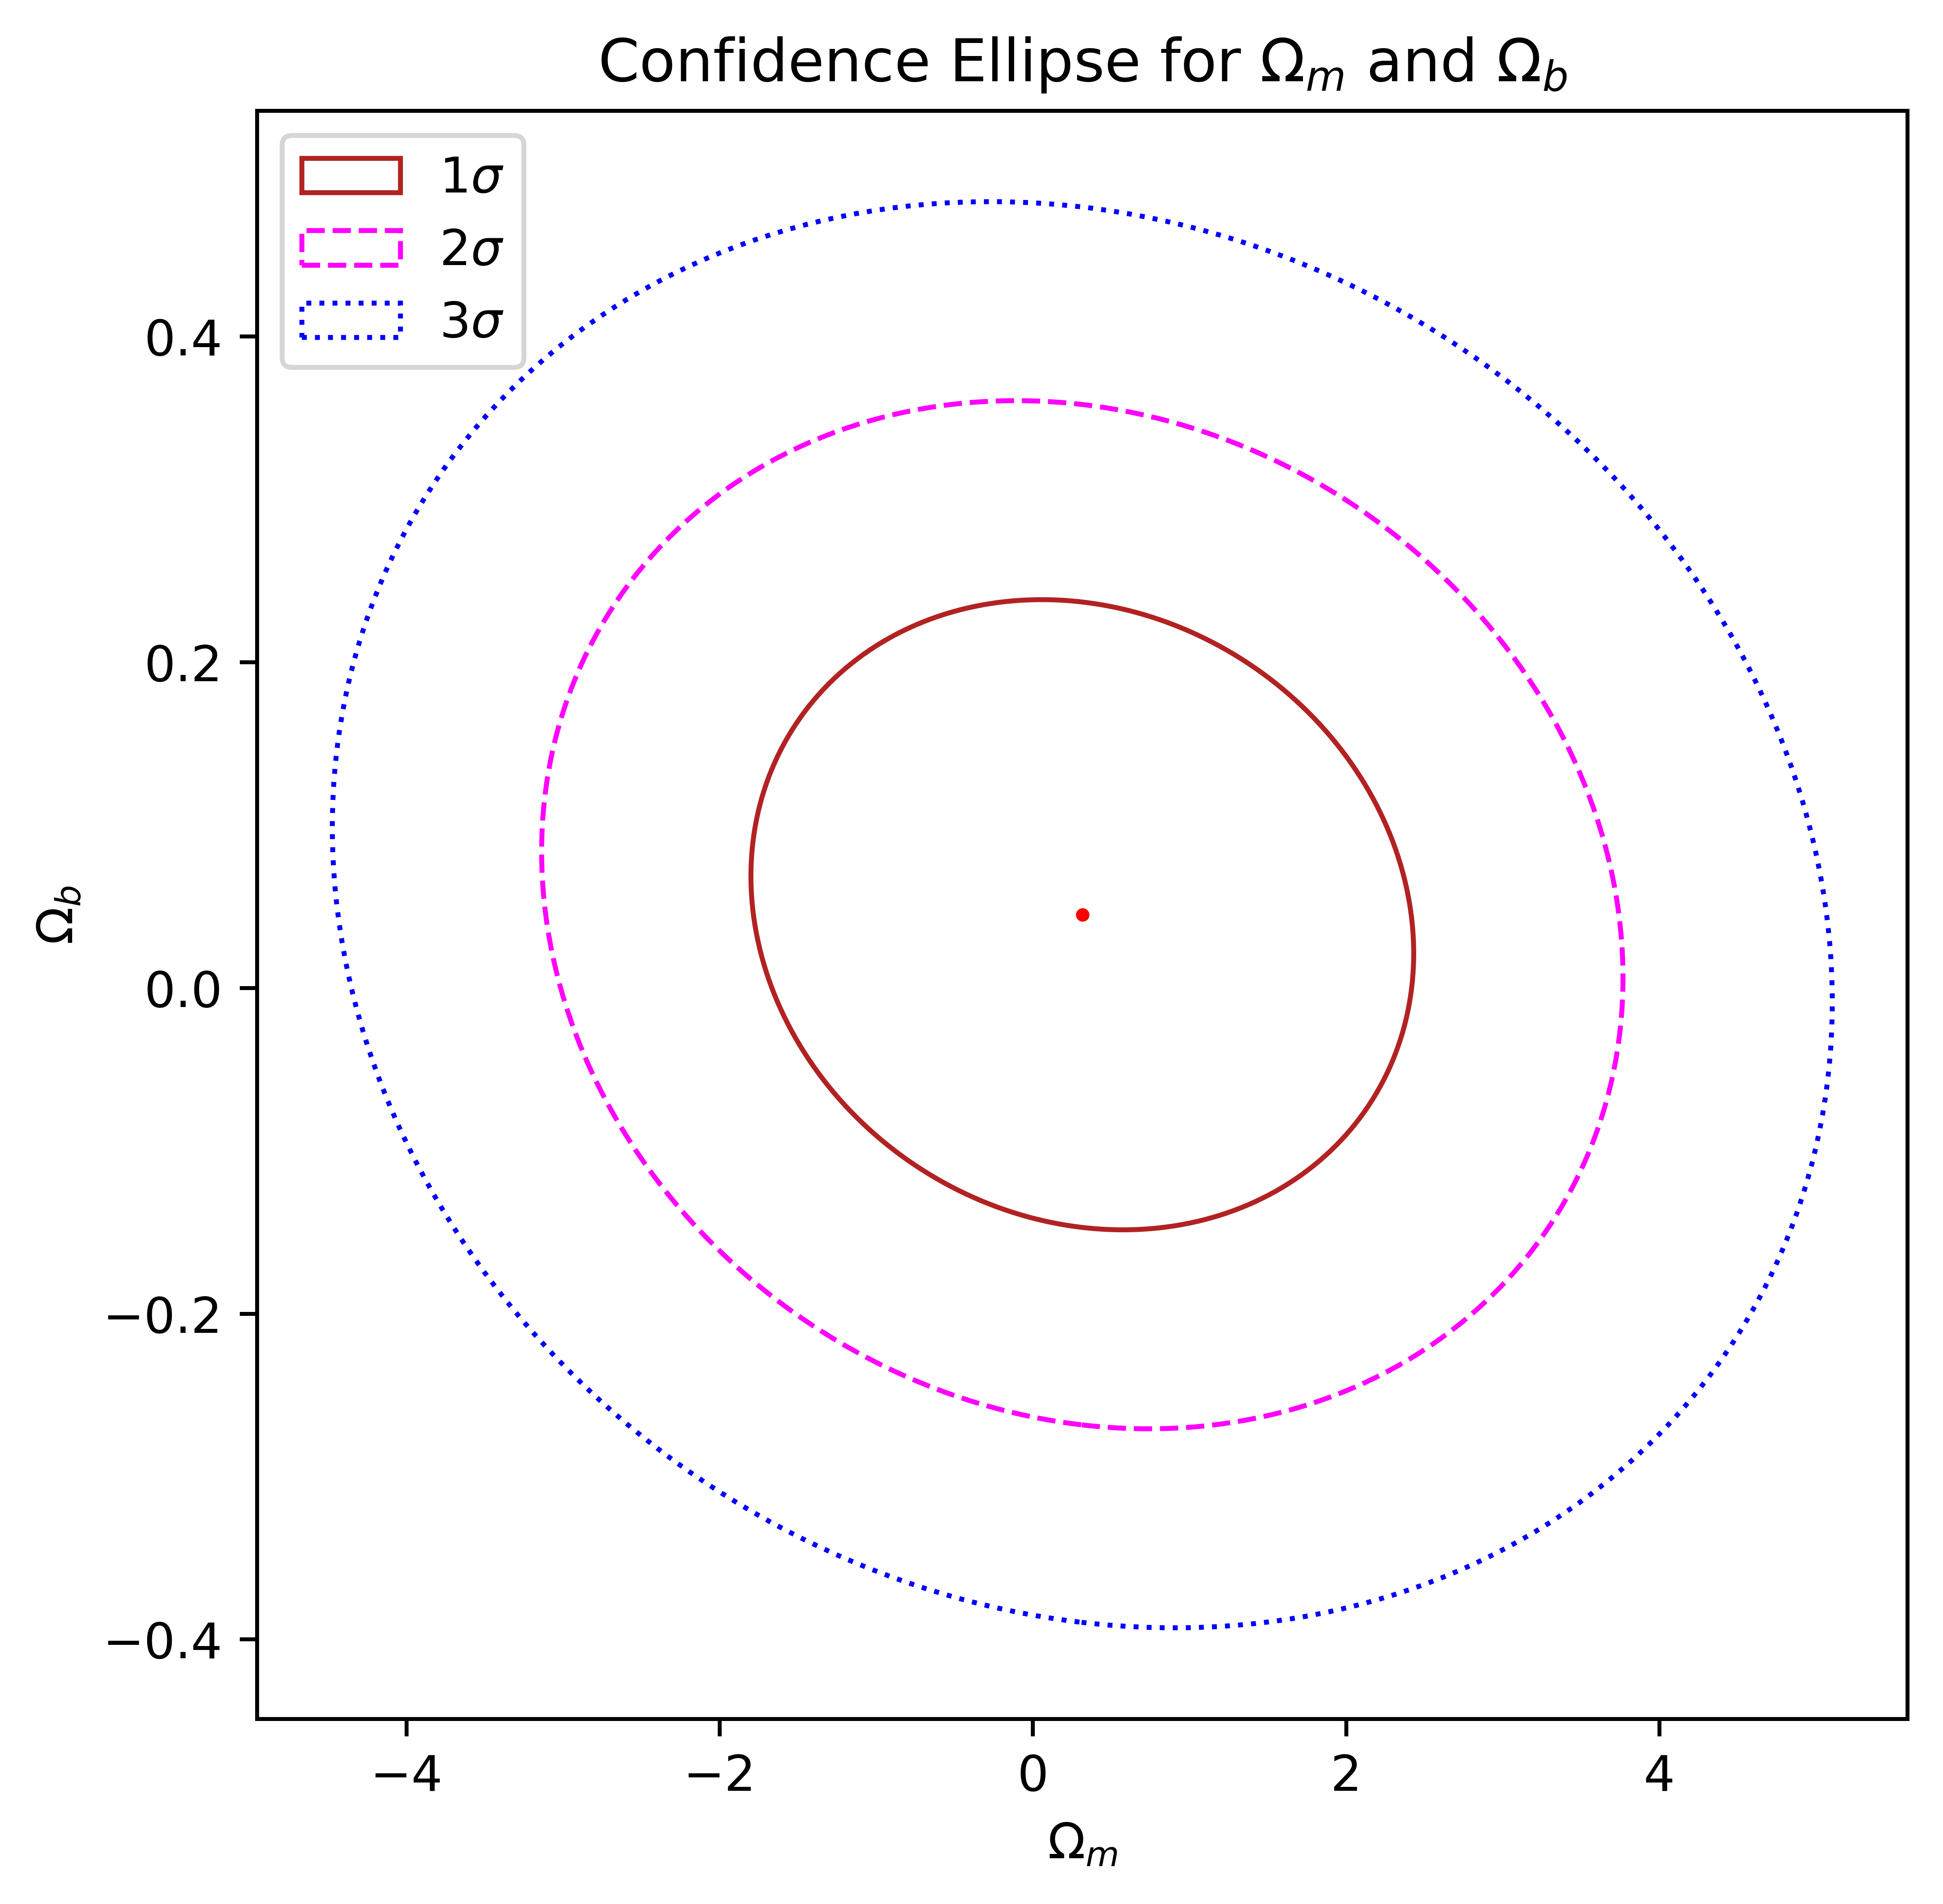

1.4214741000405549

In [34]:
print("4 bins of equal redshift")
plotConfidenceEllipse(covar_p_s["z_4"], "Omega_m", "Omega_b")

let's compare
1. fixing parameter: take the 2*2 submatrix of the fisher matrix, and then take its inverse
2. marginalize over: take the inverse of fisher matrix, and then take the 2*2 submatrix
both for w_0 and w_a
the order of calculation in papers follows 2

In [35]:
print("1: fixing parameters")
np.linalg.inv(subcov(fisher_s["n_4"], 'w_0', 'w_a'))

1: fixing parameters


array([[ 0.01116999, -0.0045403 ],
       [-0.0045403 ,  0.00208785]])

In [36]:
print("2: marginalize over")
subcov(np.linalg.inv(fisher_s["n_4"]), 'w_0', "w_a")

2: marginalize over


array([[ 1.29130873, -0.13732767],
       [-0.13732767,  0.02904749]])

In [37]:
sub_order1 = np.linalg.inv(subcov(fisher_s["n_4"], 'w_0', 'w_a'))
sub_order2 = subcov(np.linalg.inv(fisher_s["n_4"]), 'w_0', "w_a")

order of calculation 1: fixing parameters
w_0 = -1 +- 0.1142384011872373

w_a = 0 +- 0.014402137849009409

Figure of Merit for w_0 and w_a is 151.95007854276764



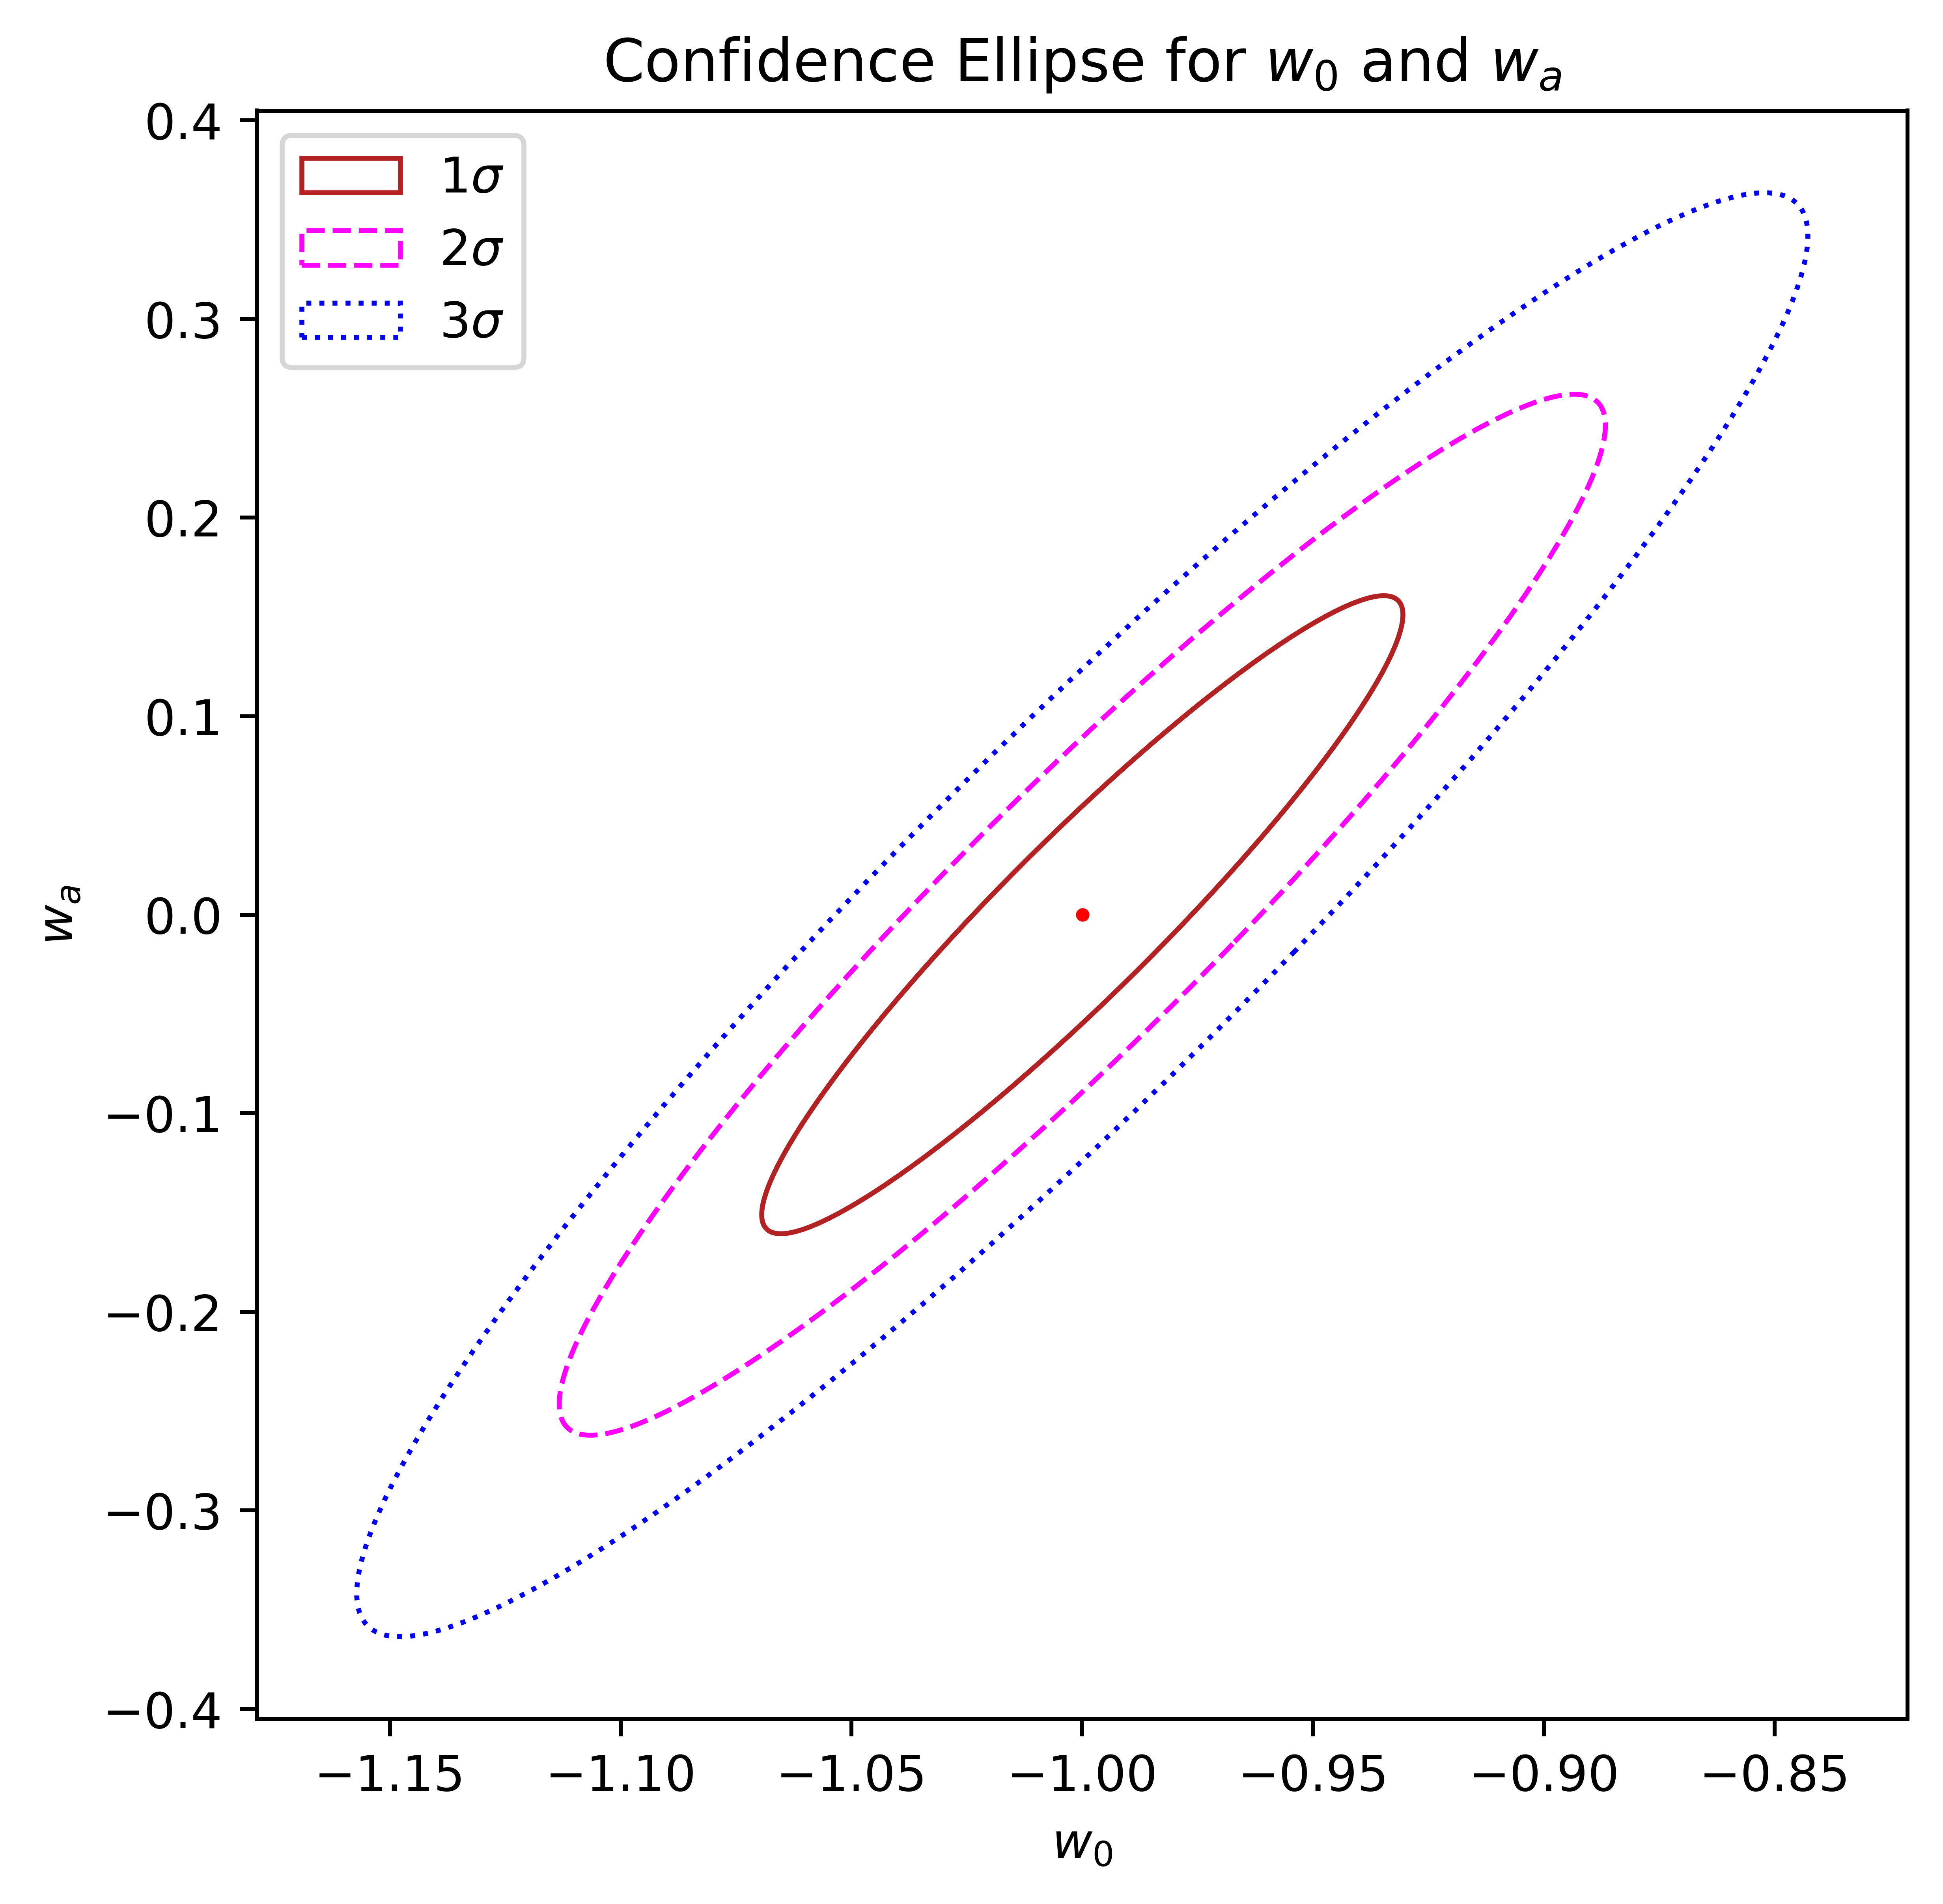

151.95007854276764

In [38]:
print("order of calculation 1: fixing parameters")
plotConfidenceEllipse_sub(sub_order1, "w_0", "w_a")

order of calculation 2: marginalize over
w_0 = -1 +- 1.1428370450351015

w_a = 0 +- 0.1194977156180643

Figure of Merit for w_0 and w_a is 1.8306111190902619



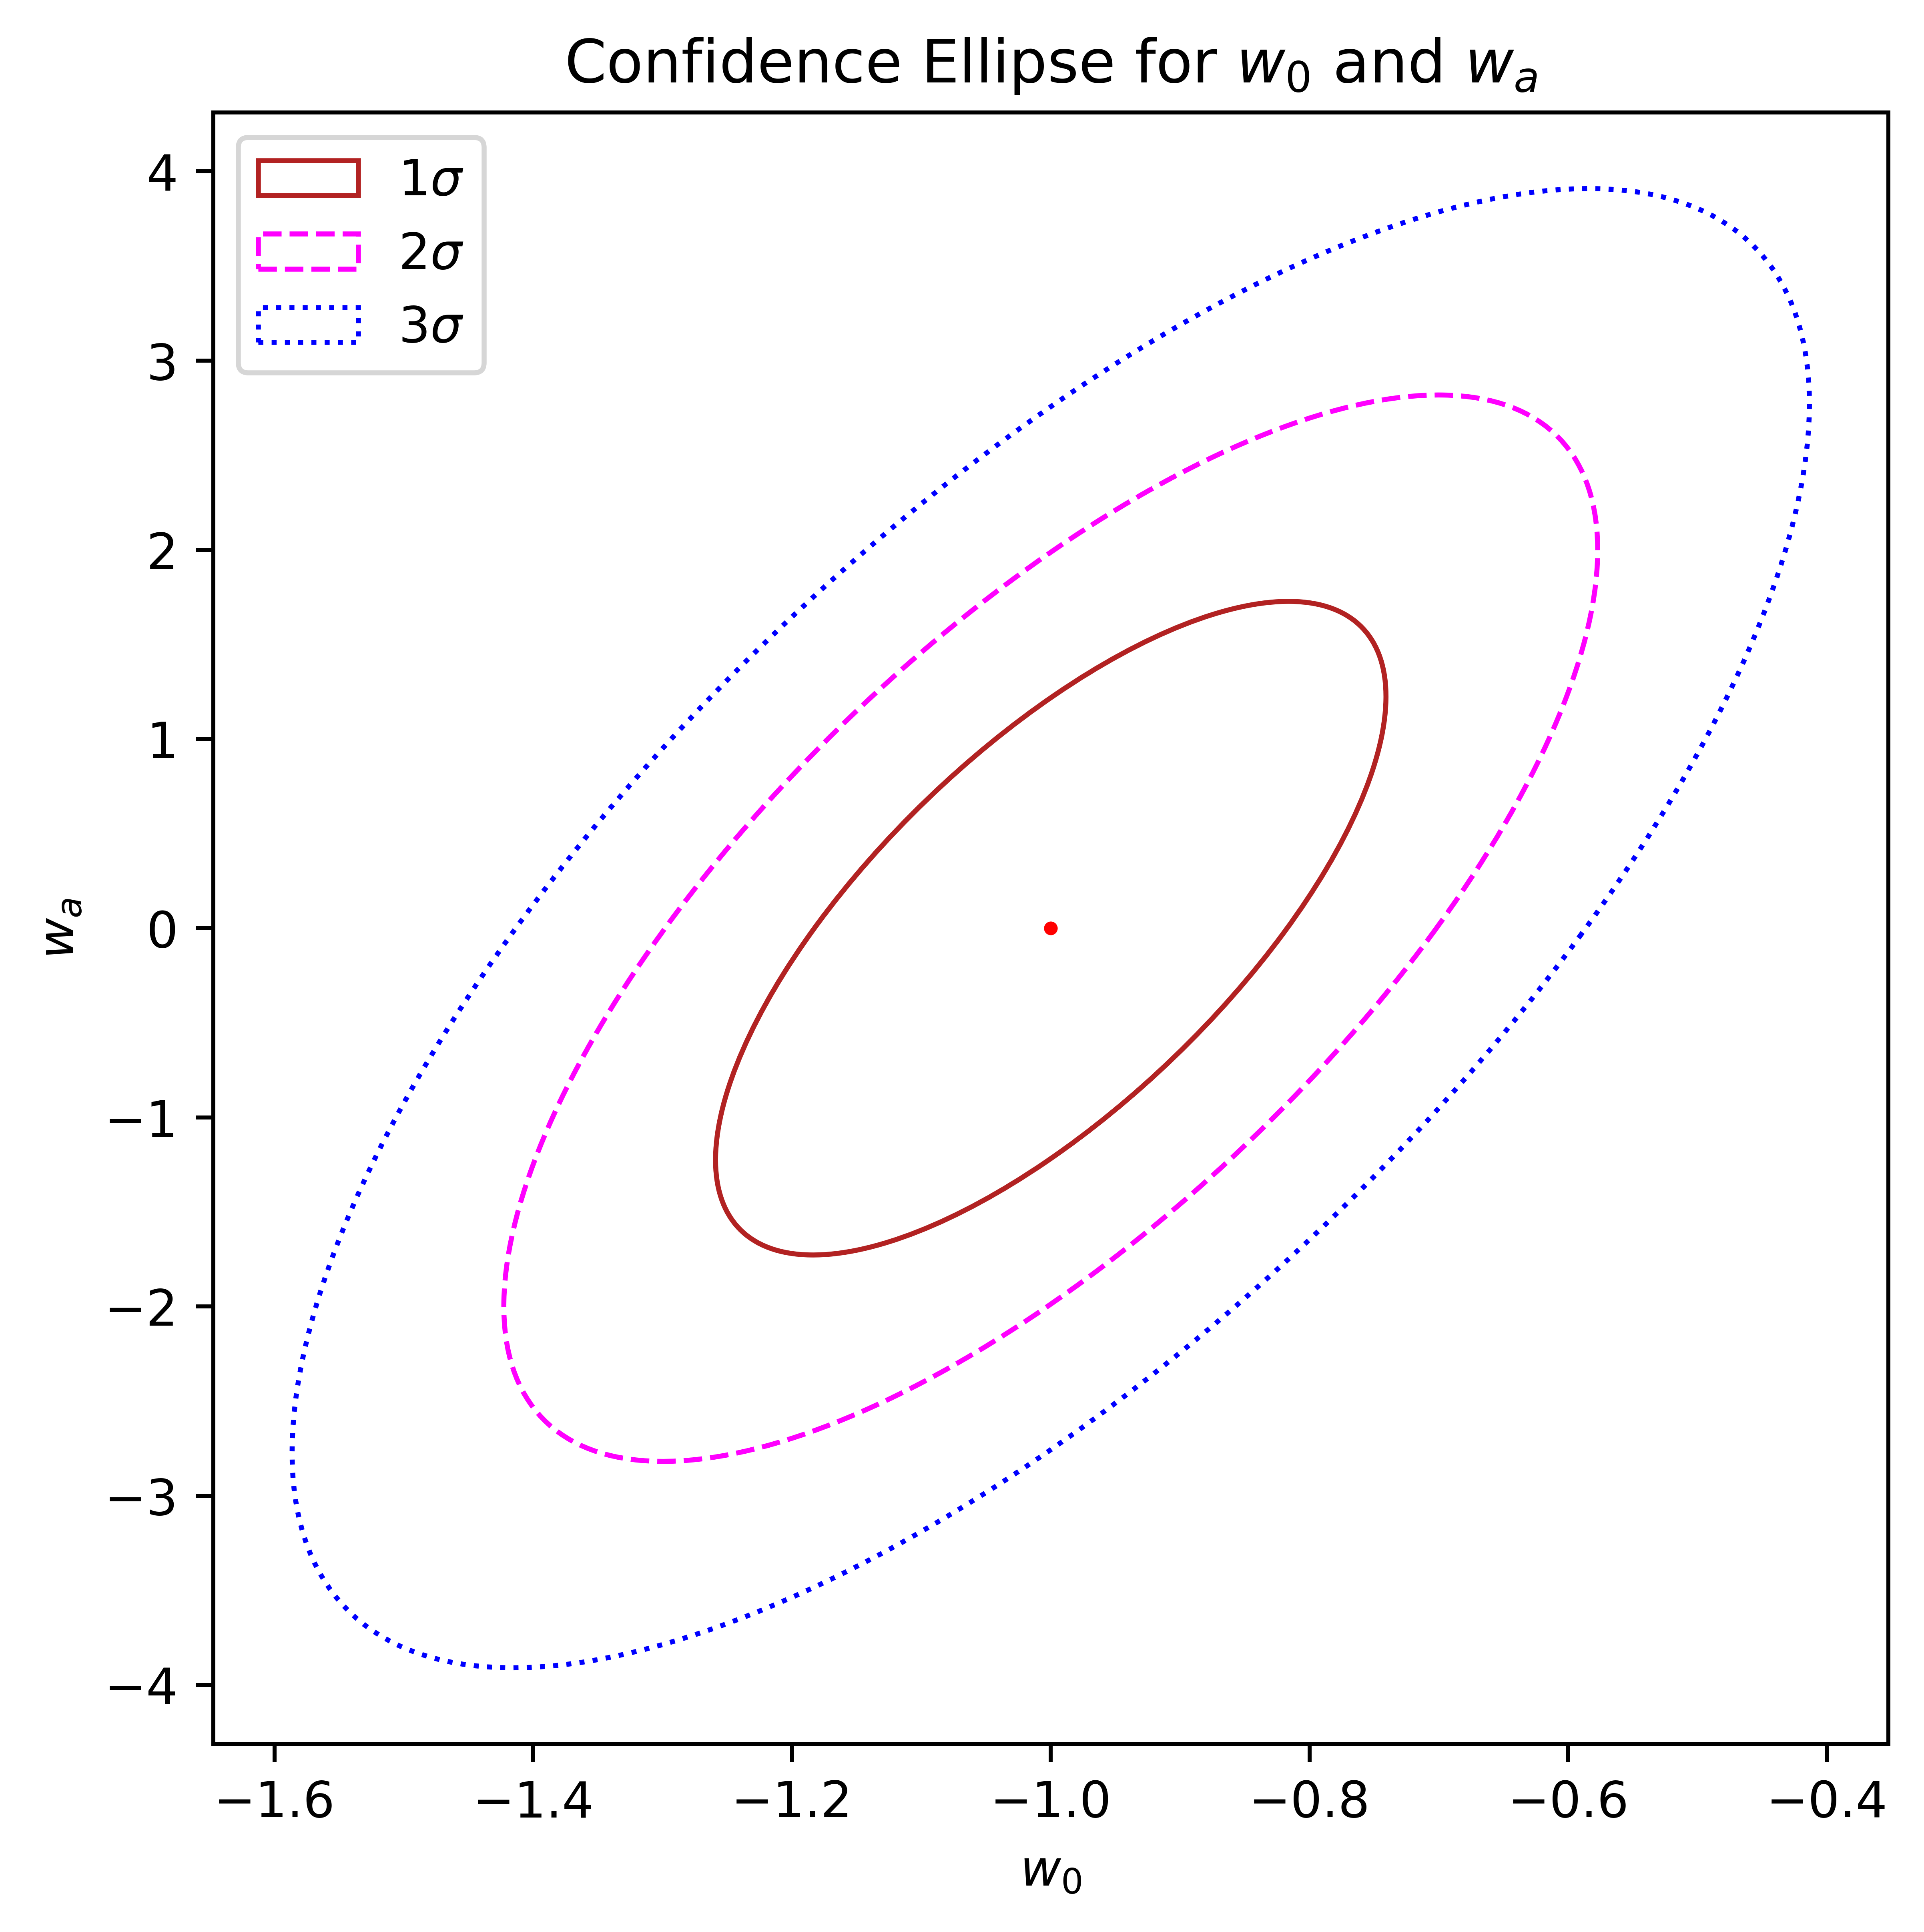

1.8306111190902619

In [39]:
print("order of calculation 2: marginalize over")
plotConfidenceEllipse_sub(sub_order2, "w_0", "w_a")

In [40]:
sub_order3 = np.linalg.inv(subcov(fisher_s["n_4"], 'Omega_m', 'Omega_b'))
sub_order4 = subcov(np.linalg.inv(fisher_s["n_4"]), 'Omega_m', "Omega_b")

order of calculation 1:fixing parameter
Omega_m = 0.315 +- 0.0048803172878068065

Omega_b = 0.045 +- 0.0019885668827047923

Figure of Merit for Omega_m and Omega_b is 25760.349334481474



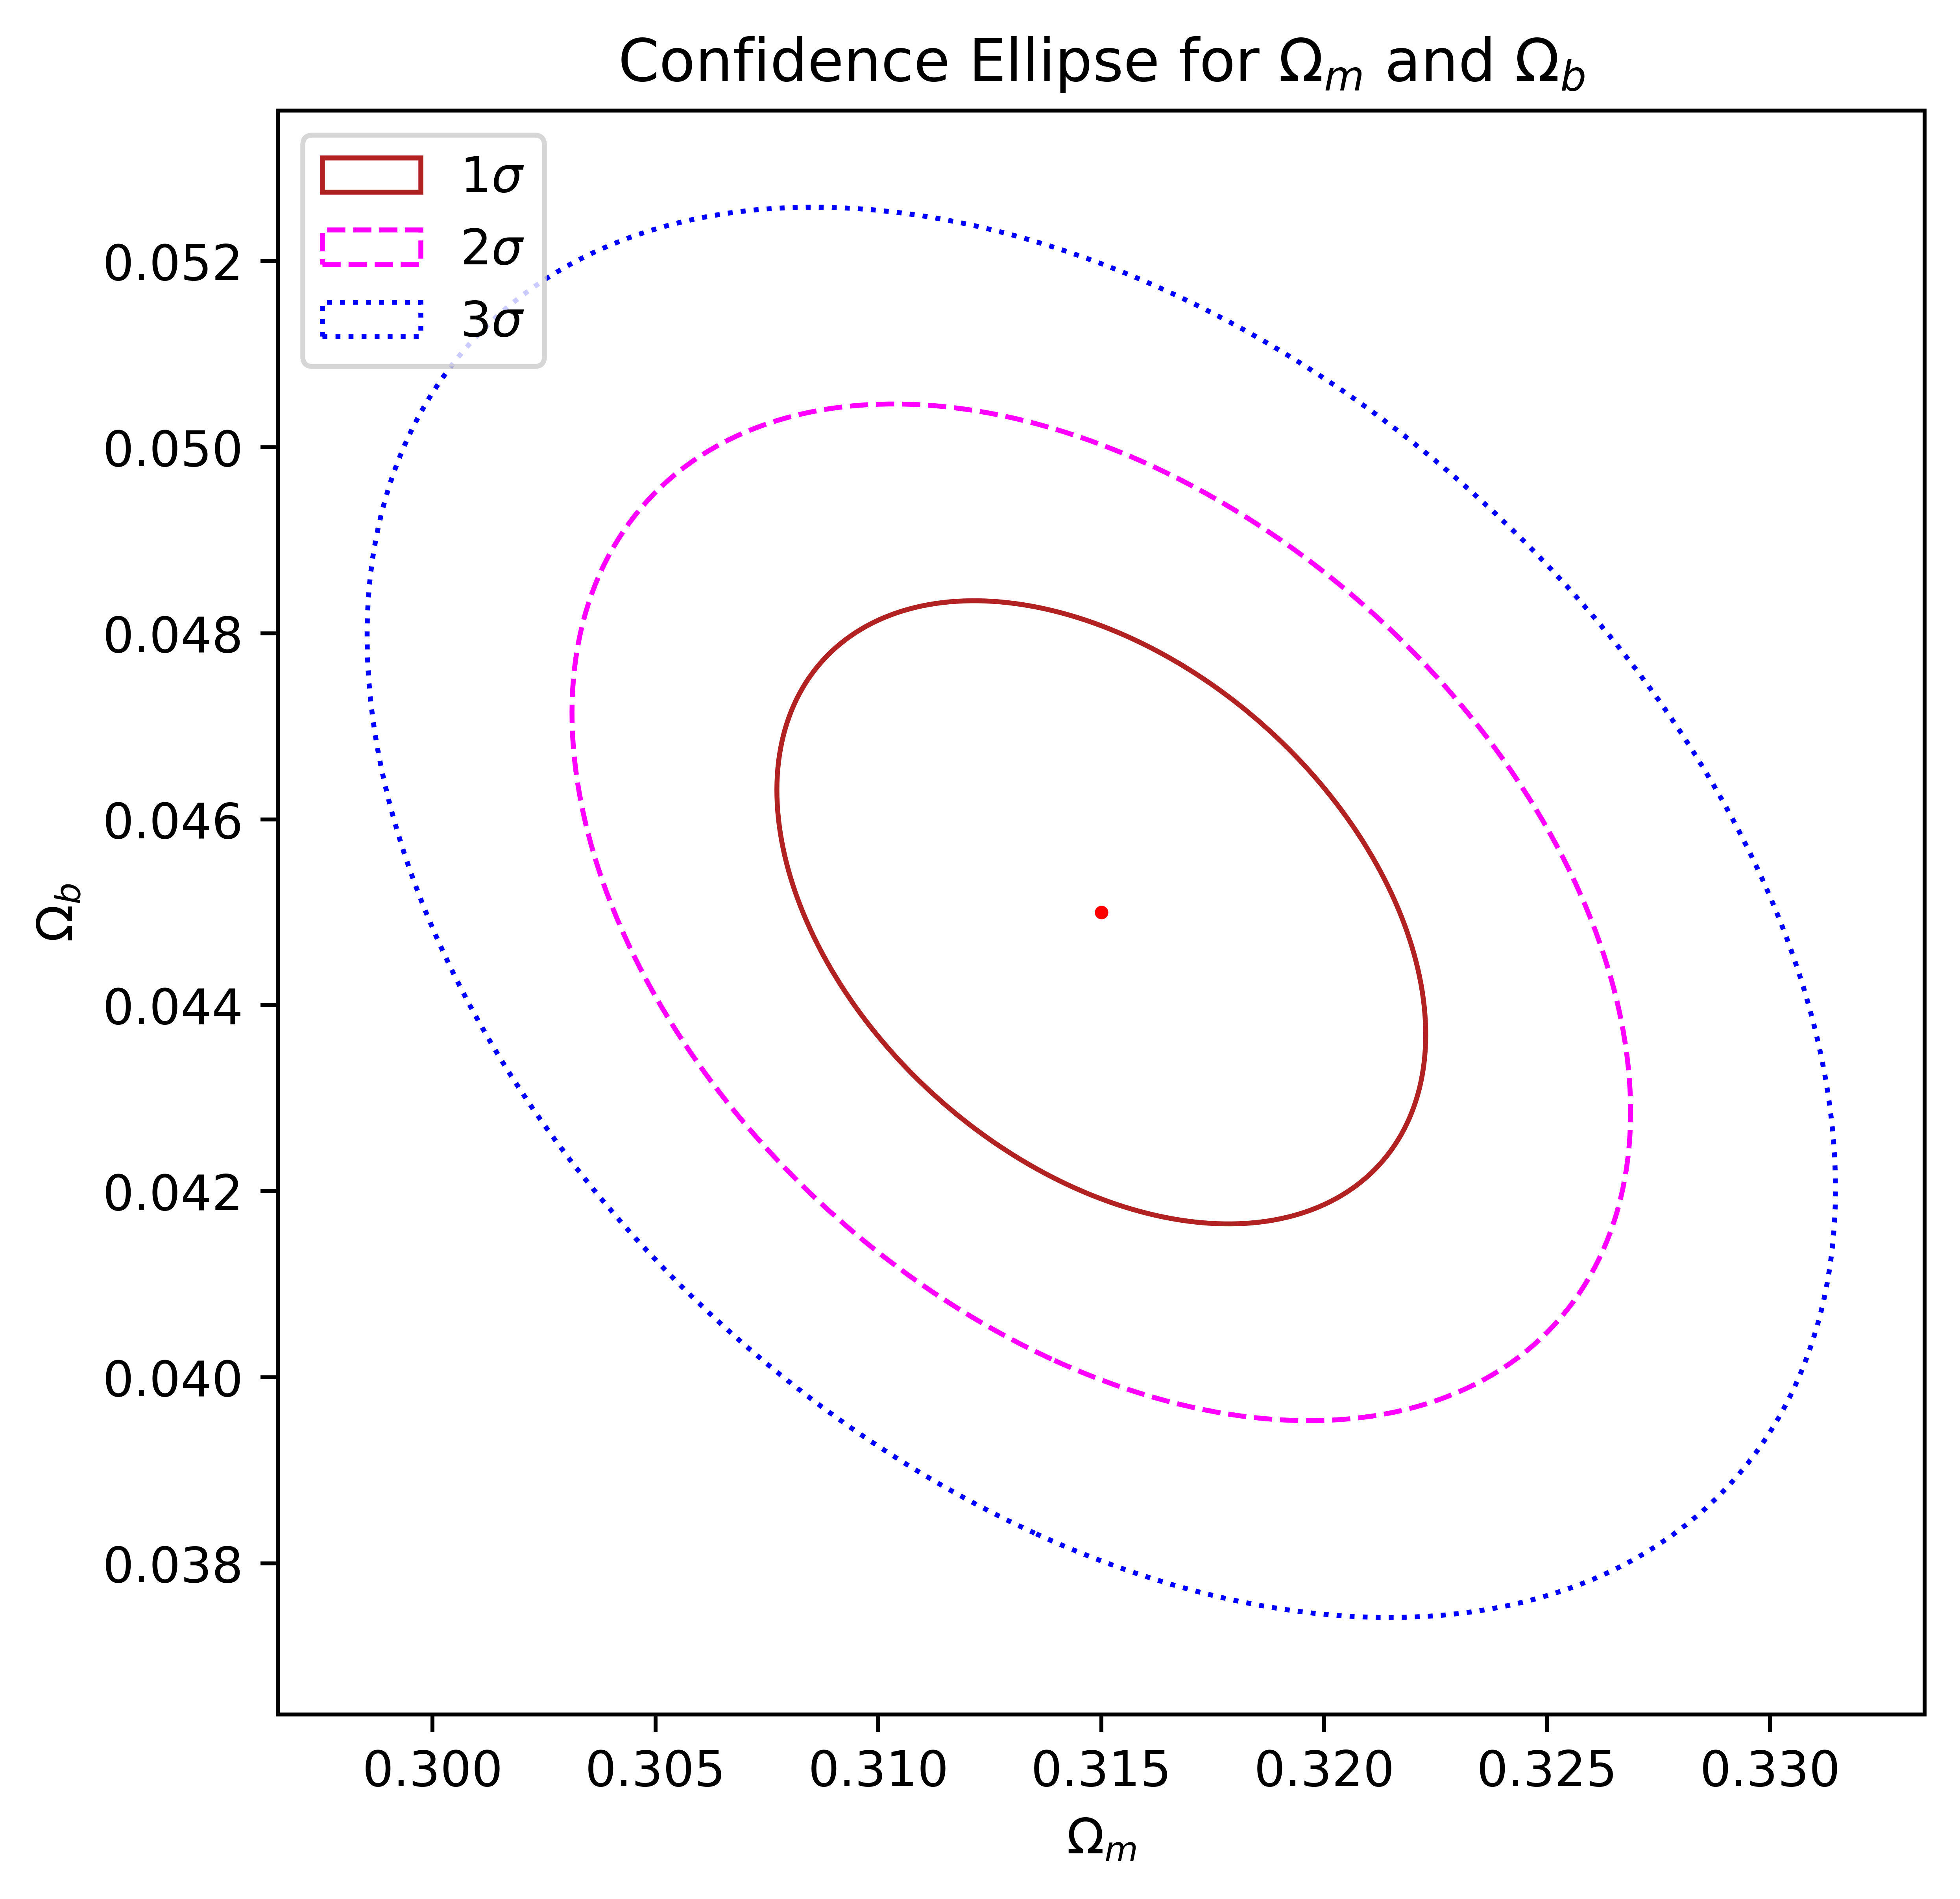

25760.349334481474

In [41]:
print("order of calculation 1:fixing parameter")
plotConfidenceEllipse_sub(sub_order3, 'Omega_m', 'Omega_b')

order of calculation 2: marginalize over
Omega_m = 0.315 +- 1.6693662720136229

Omega_b = 0.045 +- 0.19780467501763904

Figure of Merit for Omega_m and Omega_b is 0.7570975176089527



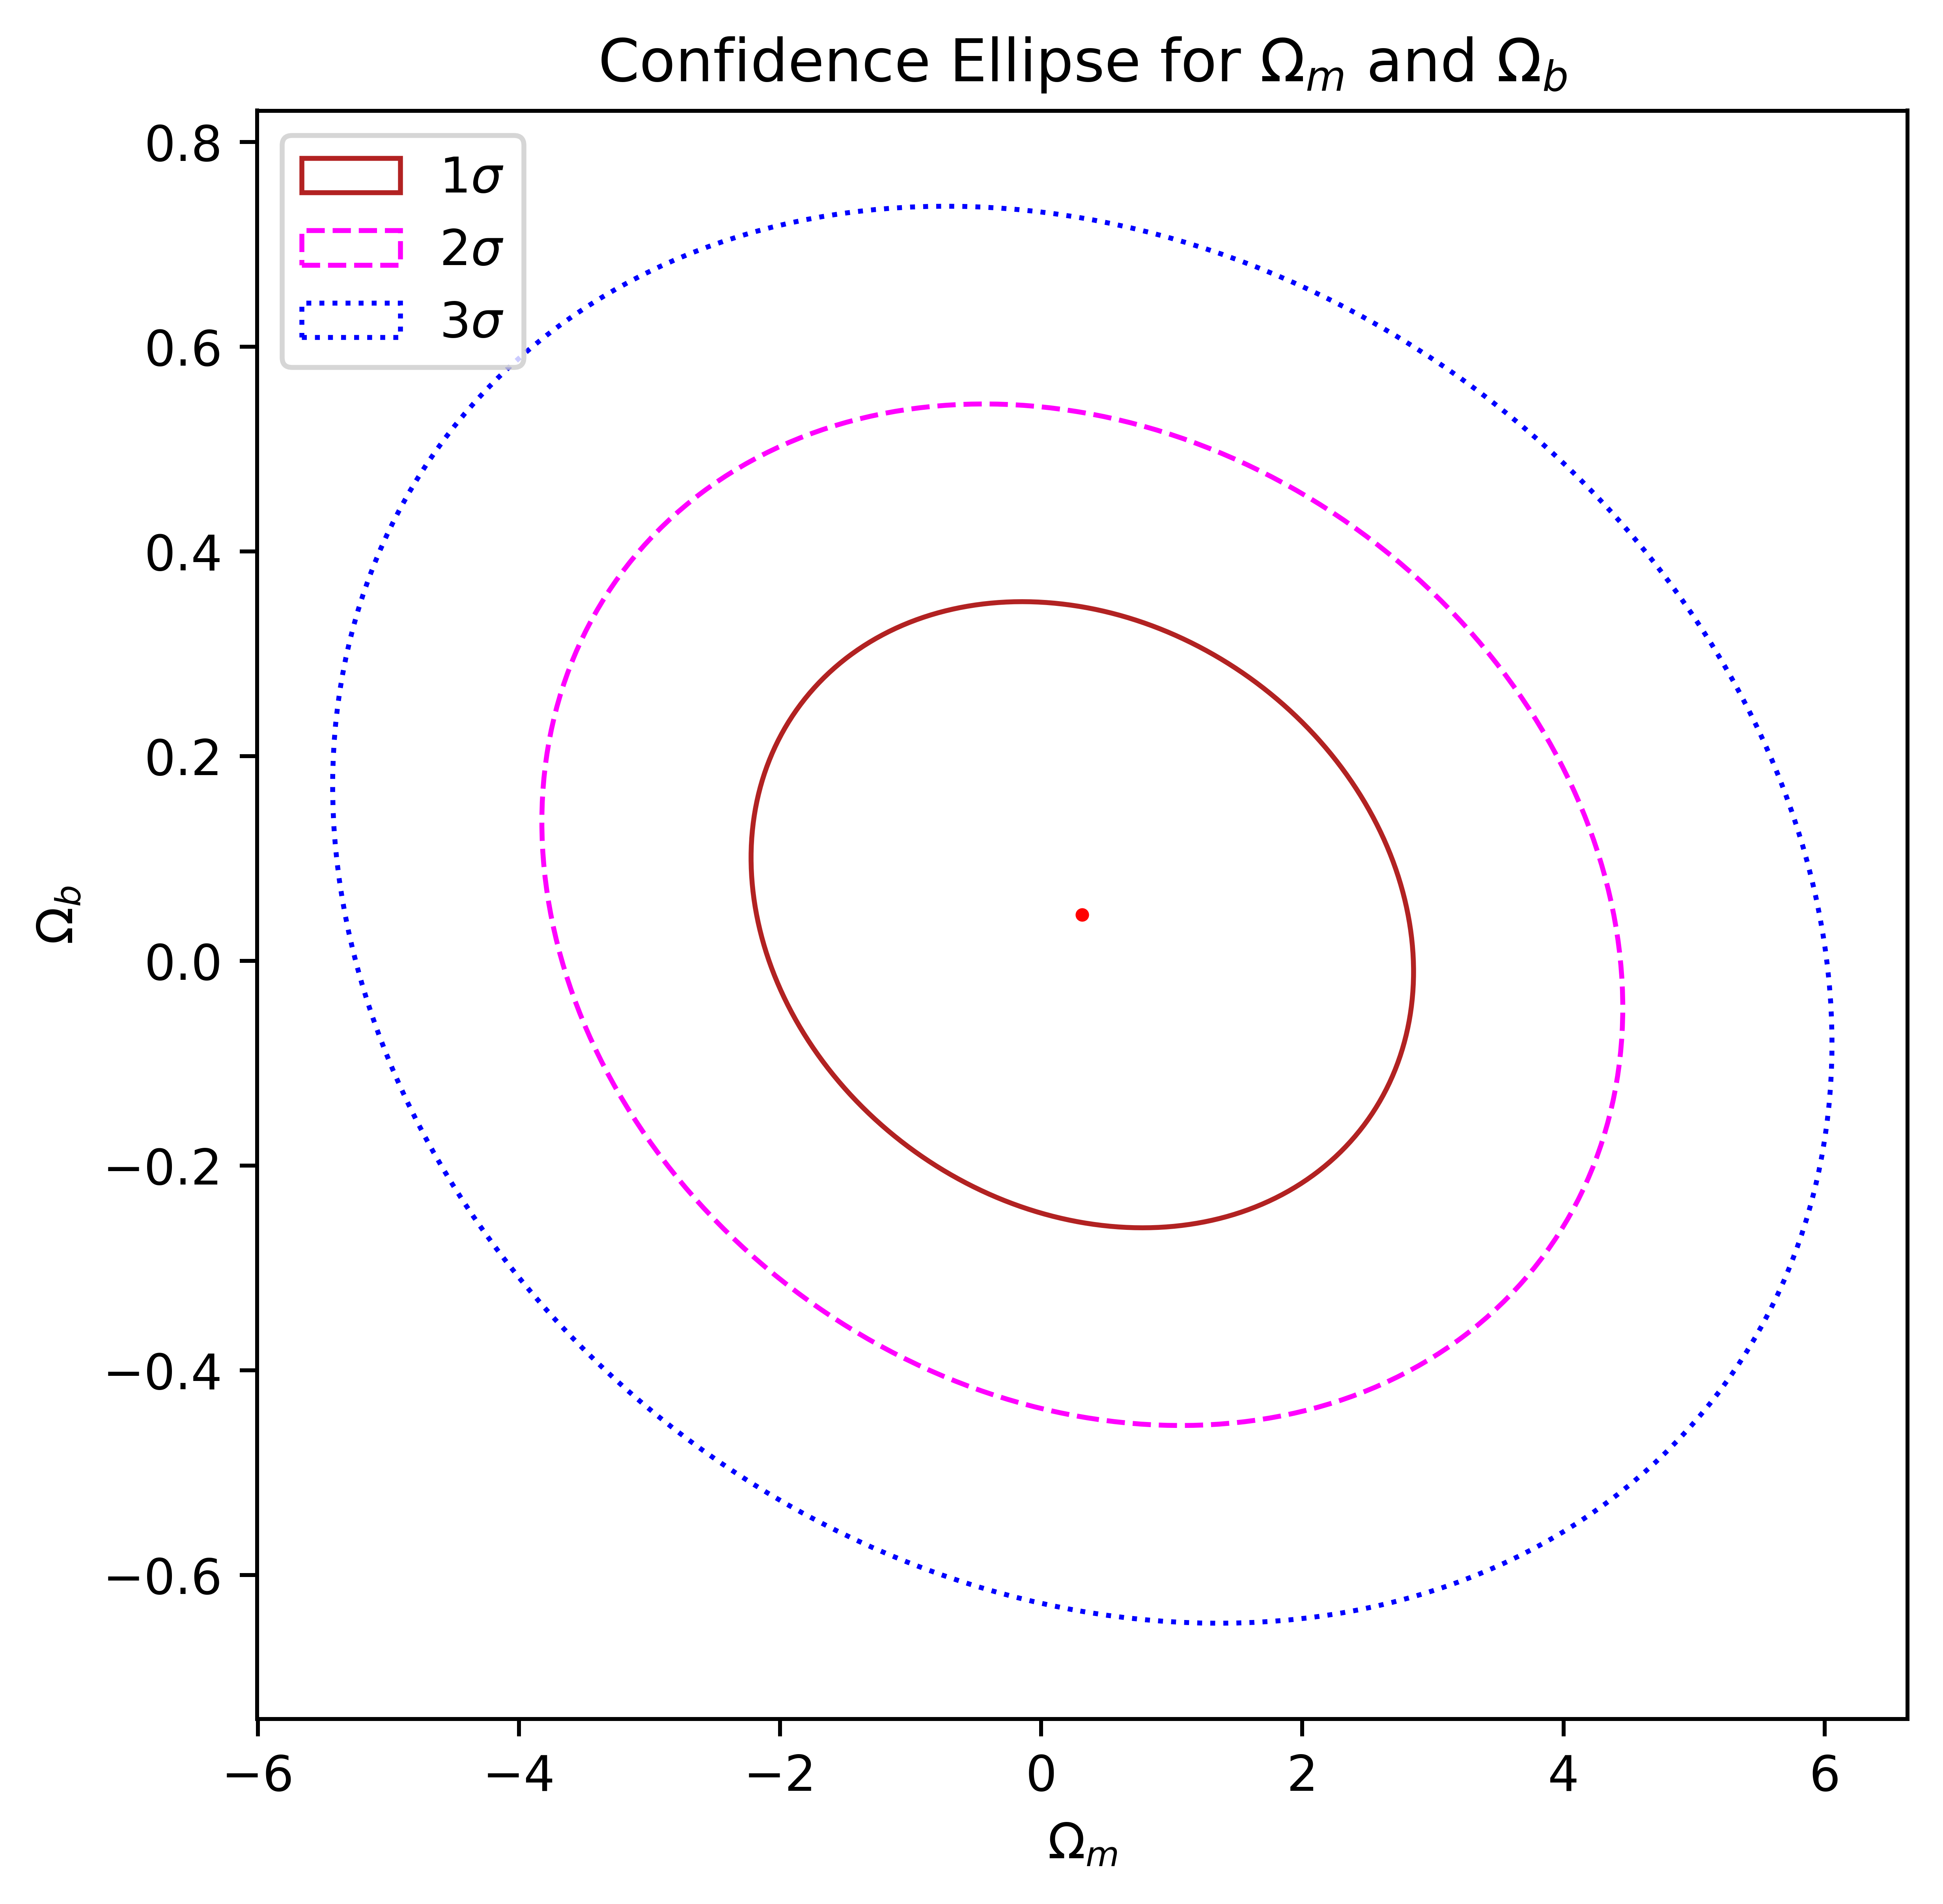

0.7570975176089527

In [42]:
print("order of calculation 2: marginalize over")
plotConfidenceEllipse_sub(sub_order4, 'Omega_m', 'Omega_b')

In [43]:
print(sub_order3)

[[4.85798426e-06 4.13902771e-06]
 [4.13902771e-06 2.29139108e-05]]


In [44]:
print(sub_order4)

[[0.04048472 0.06107014]
 [0.06107014 2.78542572]]
